In [5]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from turtle import color
from sklearn.linear_model import LinearRegression


In [6]:
data = pd.read_csv("EntireHomeAptMex.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17430 entries, 0 to 17429
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 17430 non-null  int64  
 1   room_type                  17430 non-null  object 
 2   price                      17430 non-null  float64
 3   host_is_superhost          17430 non-null  float64
 4   host_acceptance_rate       17430 non-null  float64
 5   bathrooms                  17430 non-null  float64
 6   review_scores_cleanliness  17430 non-null  float64
 7   host_identity_verified     17430 non-null  float64
 8   instant_bookable           17430 non-null  float64
 9   property_type              17430 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.3+ MB


In [7]:
data = data.copy()
data_2 = data.copy()
data_3= data.copy()
data_4 = data.copy()
data_5 = data.copy()
data_6 = data.copy()
data_7 = data.copy()

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

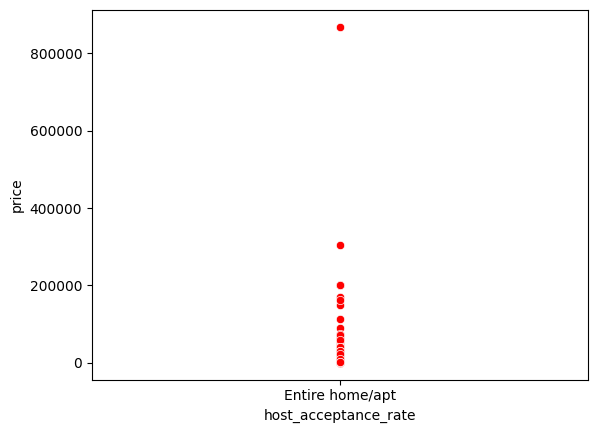

In [8]:
#imprimimos el scarlert plot entre la variable dependiente (total) e independiente (alcohol)
#Dependiente es la que se quiere predecir y la independiente es aquella que puede aportar información para hacer un análisis 


sns.scatterplot(x='host_acceptance_rate', y='price', color='blue', data=data)
sns.scatterplot(x='room_type', y='price', color='red', data=data)


In [9]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data[['host_acceptance_rate']]
Var_Dep = data['price']


In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [11]:
type(model)

sklearn.linear_model._base.LinearRegression

In [12]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [13]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([10.26112709]),
 'rank_': 1,
 'singular_': array([2548.93485793]),
 'intercept_': 1252.2968910137104}

In [14]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.0005315105140043519

In [15]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([2268.1484732 , 2196.32058355, 1826.92000821, ..., 2278.40960029,
       2278.40960029, 2278.40960029])

In [16]:
#Se inserta la columna "Predicciones" al dataframe
data.insert(0, 'Predicciones',y_pred)
data

Predicciones  Unnamed: 0        room_type    price  host_is_superhost  \
0       2268.148473           0  Entire home/apt   4044.0                0.0   
1       2196.320584           1  Entire home/apt  18000.0                1.0   
2       1826.920008           2  Entire home/apt   2123.0                1.0   
3       2216.842838           3  Entire home/apt   1236.0                1.0   
4       2247.626219           5  Entire home/apt   4056.0                1.0   
...             ...         ...              ...      ...                ...   
17425   2278.409600       26274  Entire home/apt   1212.0                0.0   
17426   2278.409600       26275  Entire home/apt  22347.0                1.0   
17427   2278.409600       26277  Entire home/apt   8897.0                0.0   
17428   2278.409600       26279  Entire home/apt   3125.0                1.0   
17429   2278.409600       26280  Entire home/apt    918.0                1.0   

       host_acceptance_rate  bathrooms  review_scores_cleanliness  \
0                      99.0        1.0                       4.80   
1                      92.0        5.5                       4.70   
2                      56.0        1.0                       4.76   
3                      94.0        1.0                       4.96   
4                      97.0        5.0                       4.84   
...                     ...        ...                        ...   
17425                 100.0        1.0                       4.80   
17426                 100.0        7.5                       4.80   
17427                 100.0        1.0                       4.80   
17428                 100.0        3.0                       4.80   
17429                 100.0        1.0                       4.80   

       host_identity_verified  instant_bookable       property_type  
0                         1.0               0.0        Entire villa  
1                         1.0               0.0         Entire home  
2                         1.0               0.0  Entire rental unit  
3                         1.0               0.0  Entire rental unit  
4                         1.0               0.0         Entire home  
...                       ...               ...                 ...  
17425                     1.0               1.0  Entire rental unit  
17426                     1.0               0.0         Entire home  
17427                     1.0               1.0  Entire rental unit  
17428                     1.0               1.0  Entire rental unit  
17429                     1.0               1.0  Entire rental unit  

[17430 rows x 11 columns]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

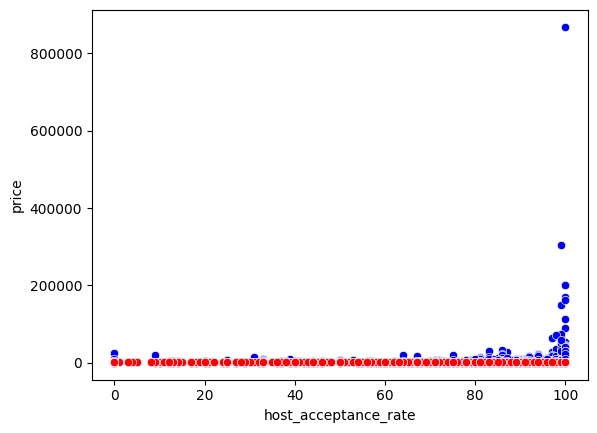

In [17]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=data)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [18]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0005315105140043519

In [19]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.023054511792799947

In [20]:
#Eliminamos columna de tipo string
data1=data.drop(data.select_dtypes(include=['object']).columns, axis=1)


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

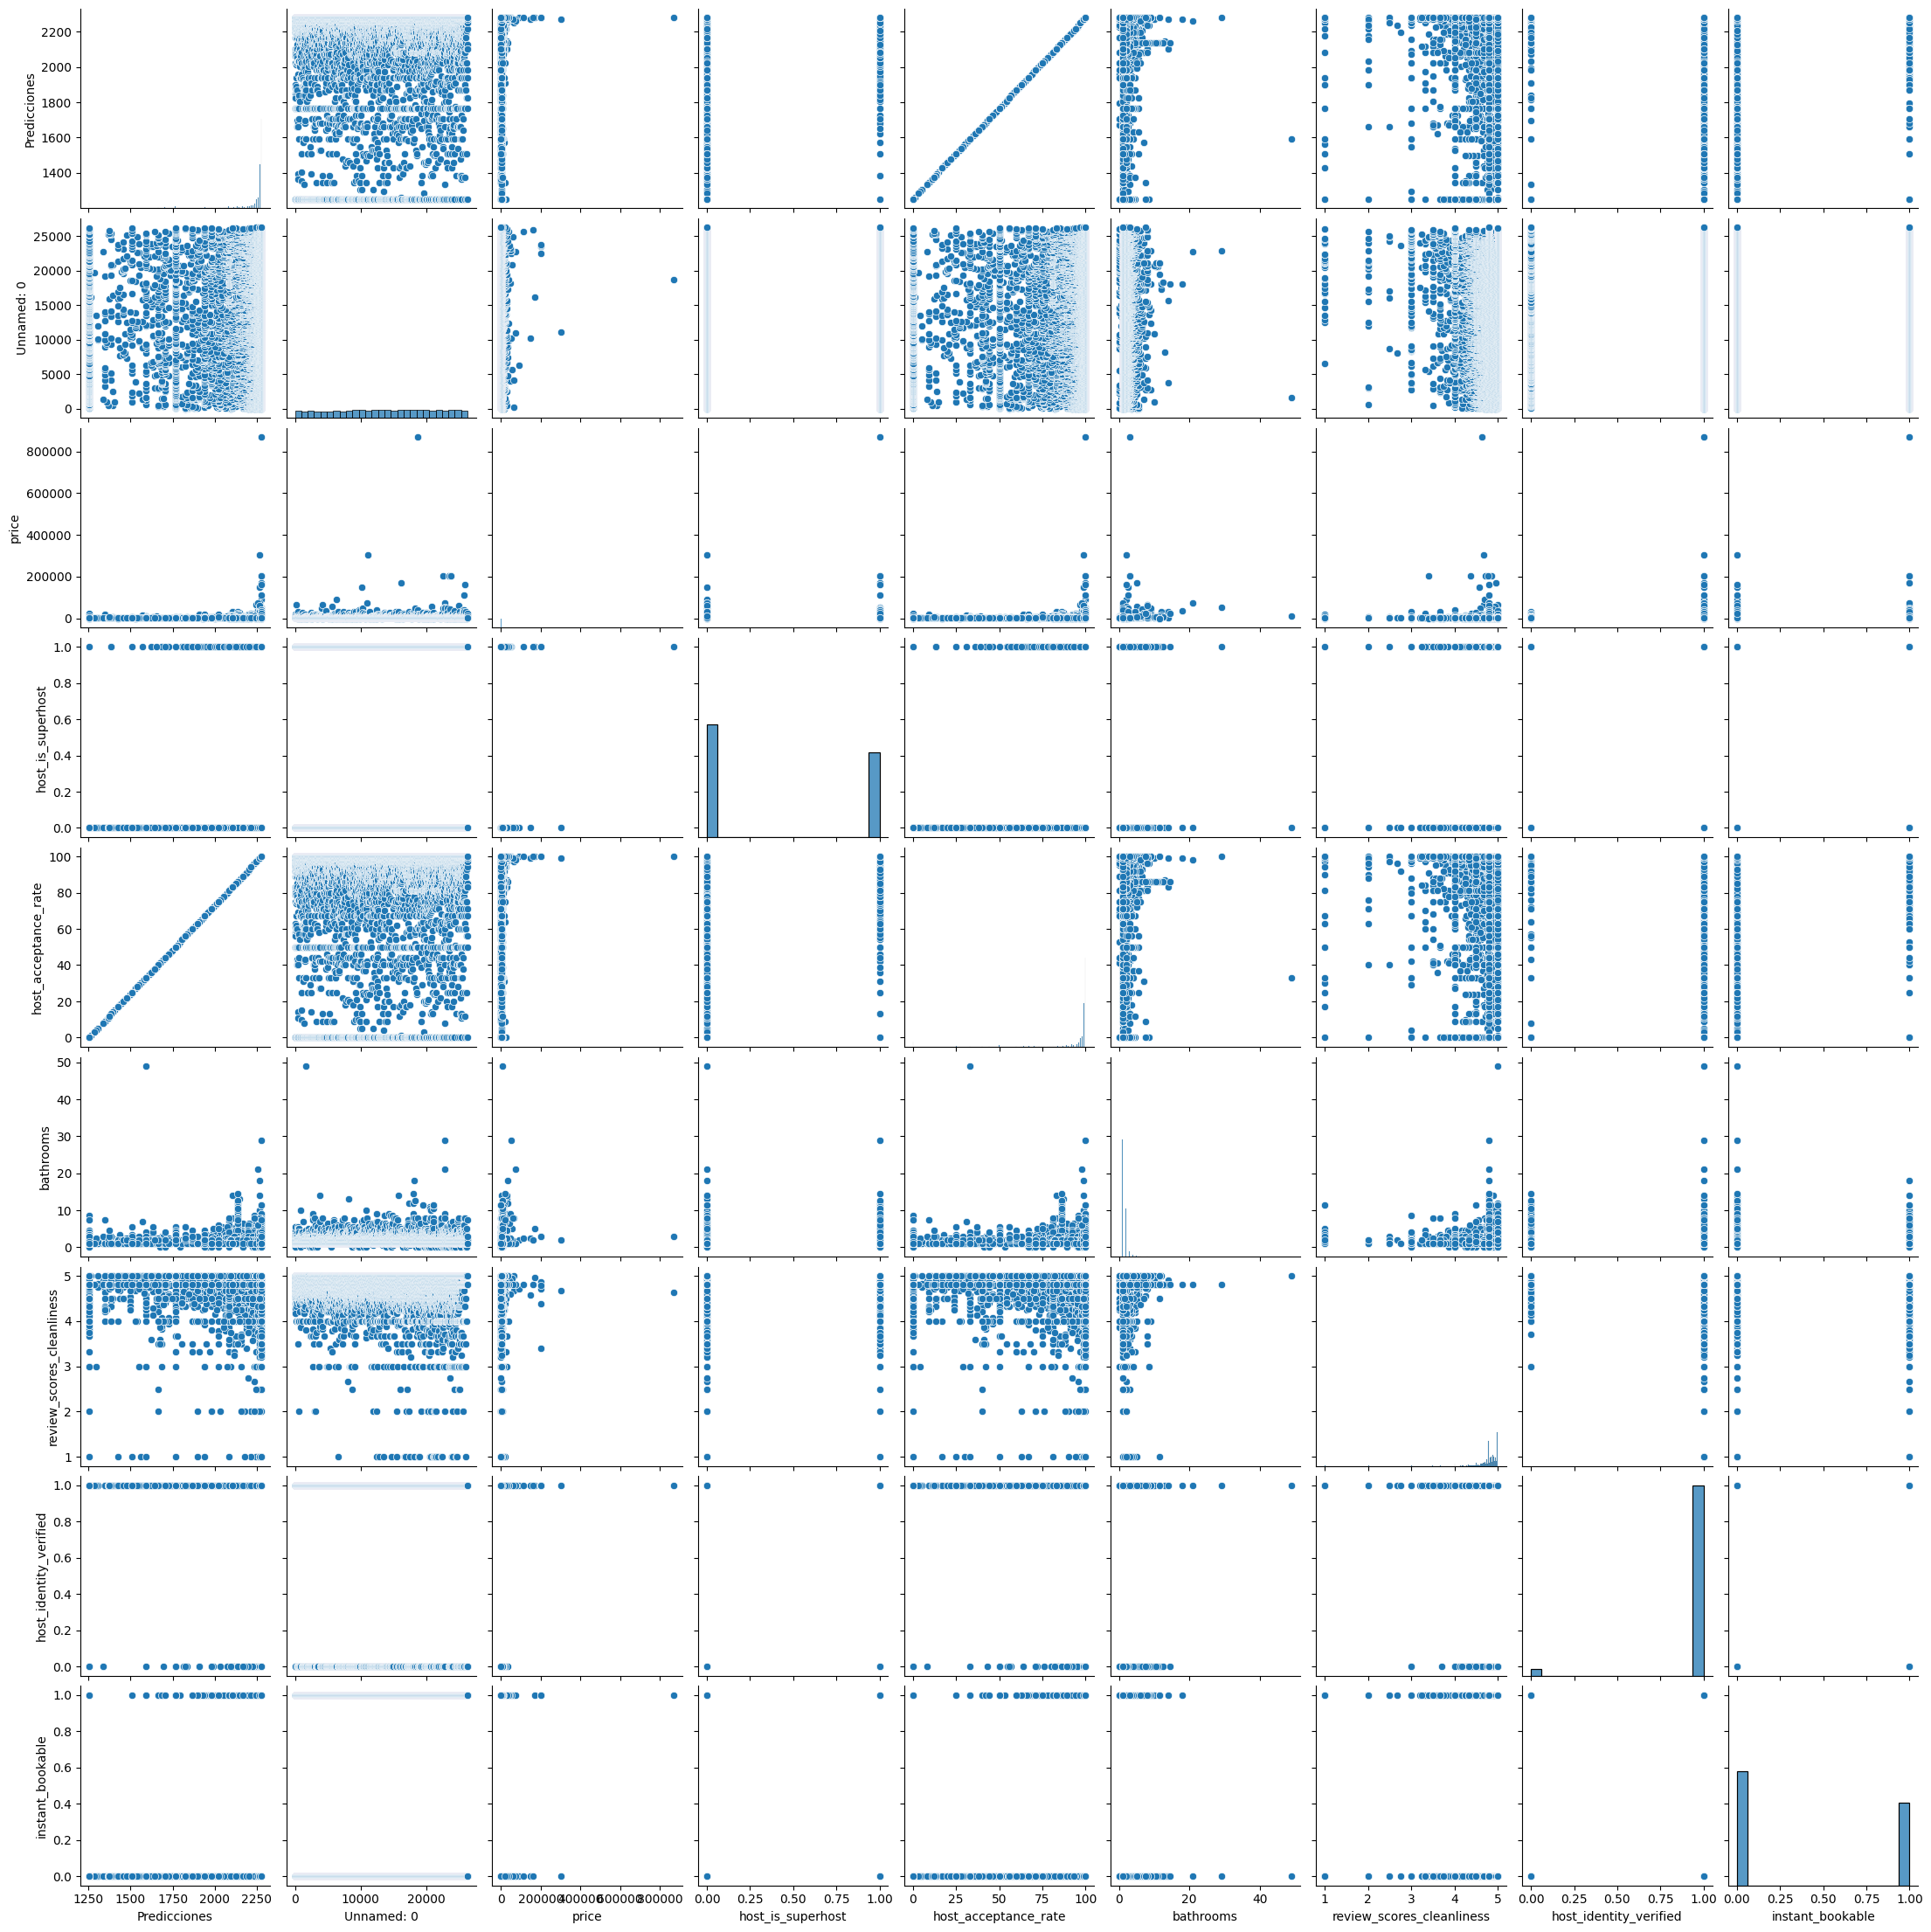

In [21]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data1)

In [22]:
#Correlaci9ones entre variables
Corr_Factors=data1.corr()
Corr_Factors

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.049559  0.023055   
Unnamed: 0                     0.049559    1.000000  0.032099   
price                          0.023055    0.032099  1.000000   
host_is_superhost              0.205222   -0.004842  0.032959   
host_acceptance_rate           1.000000    0.049559  0.023055   
bathrooms                     -0.015687    0.012079  0.191938   
review_scores_cleanliness      0.080412   -0.047282  0.002574   
host_identity_verified        -0.008928    0.043859 -0.002570   
instant_bookable               0.249771    0.207518  0.025645   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.205222              1.000000  -0.015687   
Unnamed: 0                         -0.004842              0.049559   0.012079   
price                               0.032959              0.023055   0.191938   
host_is_superhost                   1.000000              0.205222   0.028757   
host_acceptance_rate                0.205222              1.000000  -0.015687   
bathrooms                           0.028757             -0.015687   1.000000   
review_scores_cleanliness           0.201894              0.080412   0.010762   
host_identity_verified              0.062961             -0.008928  -0.054841   
instant_bookable                    0.057001              0.249771  -0.000977   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.080412               -0.008928   
Unnamed: 0                                 -0.047282                0.043859   
price                                       0.002574               -0.002570   
host_is_superhost                           0.201894                0.062961   
host_acceptance_rate                        0.080412               -0.008928   
bathrooms                                   0.010762               -0.054841   
review_scores_cleanliness                   1.000000               -0.019214   
host_identity_verified                     -0.019214                1.000000   
instant_bookable                           -0.051659                0.057544   

                           instant_bookable  
Predicciones                       0.249771  
Unnamed: 0                         0.207518  
price                              0.025645  
host_is_superhost                  0.057001  
host_acceptance_rate               0.249771  
bathrooms                         -0.000977  
review_scores_cleanliness         -0.051659  
host_identity_verified             0.057544  
instant_bookable                   1.000000

In [23]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.049559  0.023055   
Unnamed: 0                     0.049559    1.000000  0.032099   
price                          0.023055    0.032099  1.000000   
host_is_superhost              0.205222    0.004842  0.032959   
host_acceptance_rate           1.000000    0.049559  0.023055   
bathrooms                      0.015687    0.012079  0.191938   
review_scores_cleanliness      0.080412    0.047282  0.002574   
host_identity_verified         0.008928    0.043859  0.002570   
instant_bookable               0.249771    0.207518  0.025645   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.205222              1.000000   0.015687   
Unnamed: 0                          0.004842              0.049559   0.012079   
price                               0.032959              0.023055   0.191938   
host_is_superhost                   1.000000              0.205222   0.028757   
host_acceptance_rate                0.205222              1.000000   0.015687   
bathrooms                           0.028757              0.015687   1.000000   
review_scores_cleanliness           0.201894              0.080412   0.010762   
host_identity_verified              0.062961              0.008928   0.054841   
instant_bookable                    0.057001              0.249771   0.000977   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.080412                0.008928   
Unnamed: 0                                  0.047282                0.043859   
price                                       0.002574                0.002570   
host_is_superhost                           0.201894                0.062961   
host_acceptance_rate                        0.080412                0.008928   
bathrooms                                   0.010762                0.054841   
review_scores_cleanliness                   1.000000                0.019214   
host_identity_verified                      0.019214                1.000000   
instant_bookable                            0.051659                0.057544   

                           instant_bookable  
Predicciones                       0.249771  
Unnamed: 0                         0.207518  
price                              0.025645  
host_is_superhost                  0.057001  
host_acceptance_rate               0.249771  
bathrooms                          0.000977  
review_scores_cleanliness          0.051659  
host_identity_verified             0.057544  
instant_bookable                   1.000000

<Axes: >

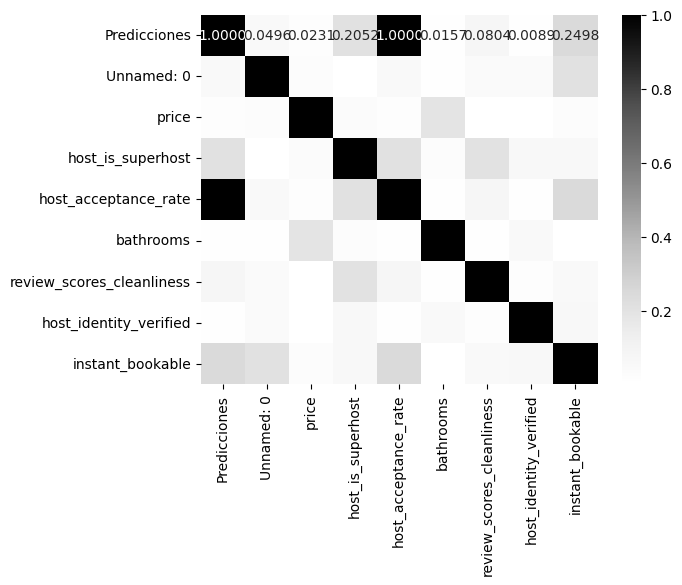

In [24]:
sns.heatmap(Corr_Factors1, cmap = "Grays", annot = True, fmt = ".4f")

**REGRESIÓN PRICE VS HOST_IS_SUPERHOST**

<Axes: xlabel='host_is_superhost', ylabel='price'>

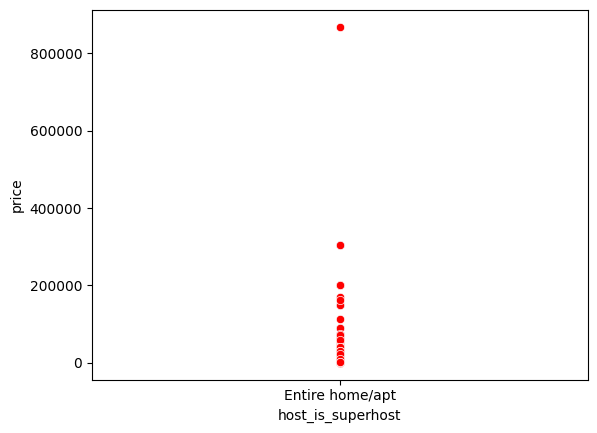

In [25]:
sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=data_2)
sns.scatterplot(x='room_type', y='price', color='red', data=data_2)

In [26]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_2[['host_is_superhost']]
Var_Dep = data_2['price']

In [27]:
model=LinearRegression()

In [28]:
#verificamos la función relacoanda al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [29]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [30]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([572.20169988]),
 'rank_': 1,
 'singular_': array([65.34627698]),
 'intercept_': 1957.3160116594681}

**modelo matemático**

In [31]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.0010862861419179692

In [32]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([1957.31601166, 2529.51771154, 2529.51771154, ..., 1957.31601166,
       2529.51771154, 2529.51771154])

In [33]:
#Se inserta la columna "Predicciones" al dataframe
data_2.insert(0, 'Predicciones',y_pred)
data_2

Predicciones  Unnamed: 0        room_type    price  host_is_superhost  \
0       1957.316012           0  Entire home/apt   4044.0                0.0   
1       2529.517712           1  Entire home/apt  18000.0                1.0   
2       2529.517712           2  Entire home/apt   2123.0                1.0   
3       2529.517712           3  Entire home/apt   1236.0                1.0   
4       2529.517712           5  Entire home/apt   4056.0                1.0   
...             ...         ...              ...      ...                ...   
17425   1957.316012       26274  Entire home/apt   1212.0                0.0   
17426   2529.517712       26275  Entire home/apt  22347.0                1.0   
17427   1957.316012       26277  Entire home/apt   8897.0                0.0   
17428   2529.517712       26279  Entire home/apt   3125.0                1.0   
17429   2529.517712       26280  Entire home/apt    918.0                1.0   

       host_acceptance_rate  bathrooms  review_scores_cleanliness  \
0                      99.0        1.0                       4.80   
1                      92.0        5.5                       4.70   
2                      56.0        1.0                       4.76   
3                      94.0        1.0                       4.96   
4                      97.0        5.0                       4.84   
...                     ...        ...                        ...   
17425                 100.0        1.0                       4.80   
17426                 100.0        7.5                       4.80   
17427                 100.0        1.0                       4.80   
17428                 100.0        3.0                       4.80   
17429                 100.0        1.0                       4.80   

       host_identity_verified  instant_bookable       property_type  
0                         1.0               0.0        Entire villa  
1                         1.0               0.0         Entire home  
2                         1.0               0.0  Entire rental unit  
3                         1.0               0.0  Entire rental unit  
4                         1.0               0.0         Entire home  
...                       ...               ...                 ...  
17425                     1.0               1.0  Entire rental unit  
17426                     1.0               0.0         Entire home  
17427                     1.0               1.0  Entire rental unit  
17428                     1.0               1.0  Entire rental unit  
17429                     1.0               1.0  Entire rental unit  

[17430 rows x 11 columns]

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='host_is_superhost', ylabel='price'>

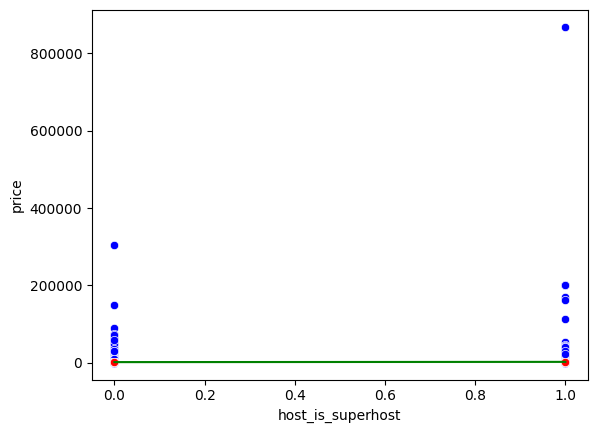

In [34]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=data_2)
sns.scatterplot(x='host_is_superhost', y='Predicciones', color="red", data=data_2)
sns.lineplot(x='host_is_superhost', y='Predicciones', color="green", data=data_2)

In [35]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0010862861419179692

In [36]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.03295885528834351

In [37]:
#Eliminamos columna de tipo string
data2=data_2.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

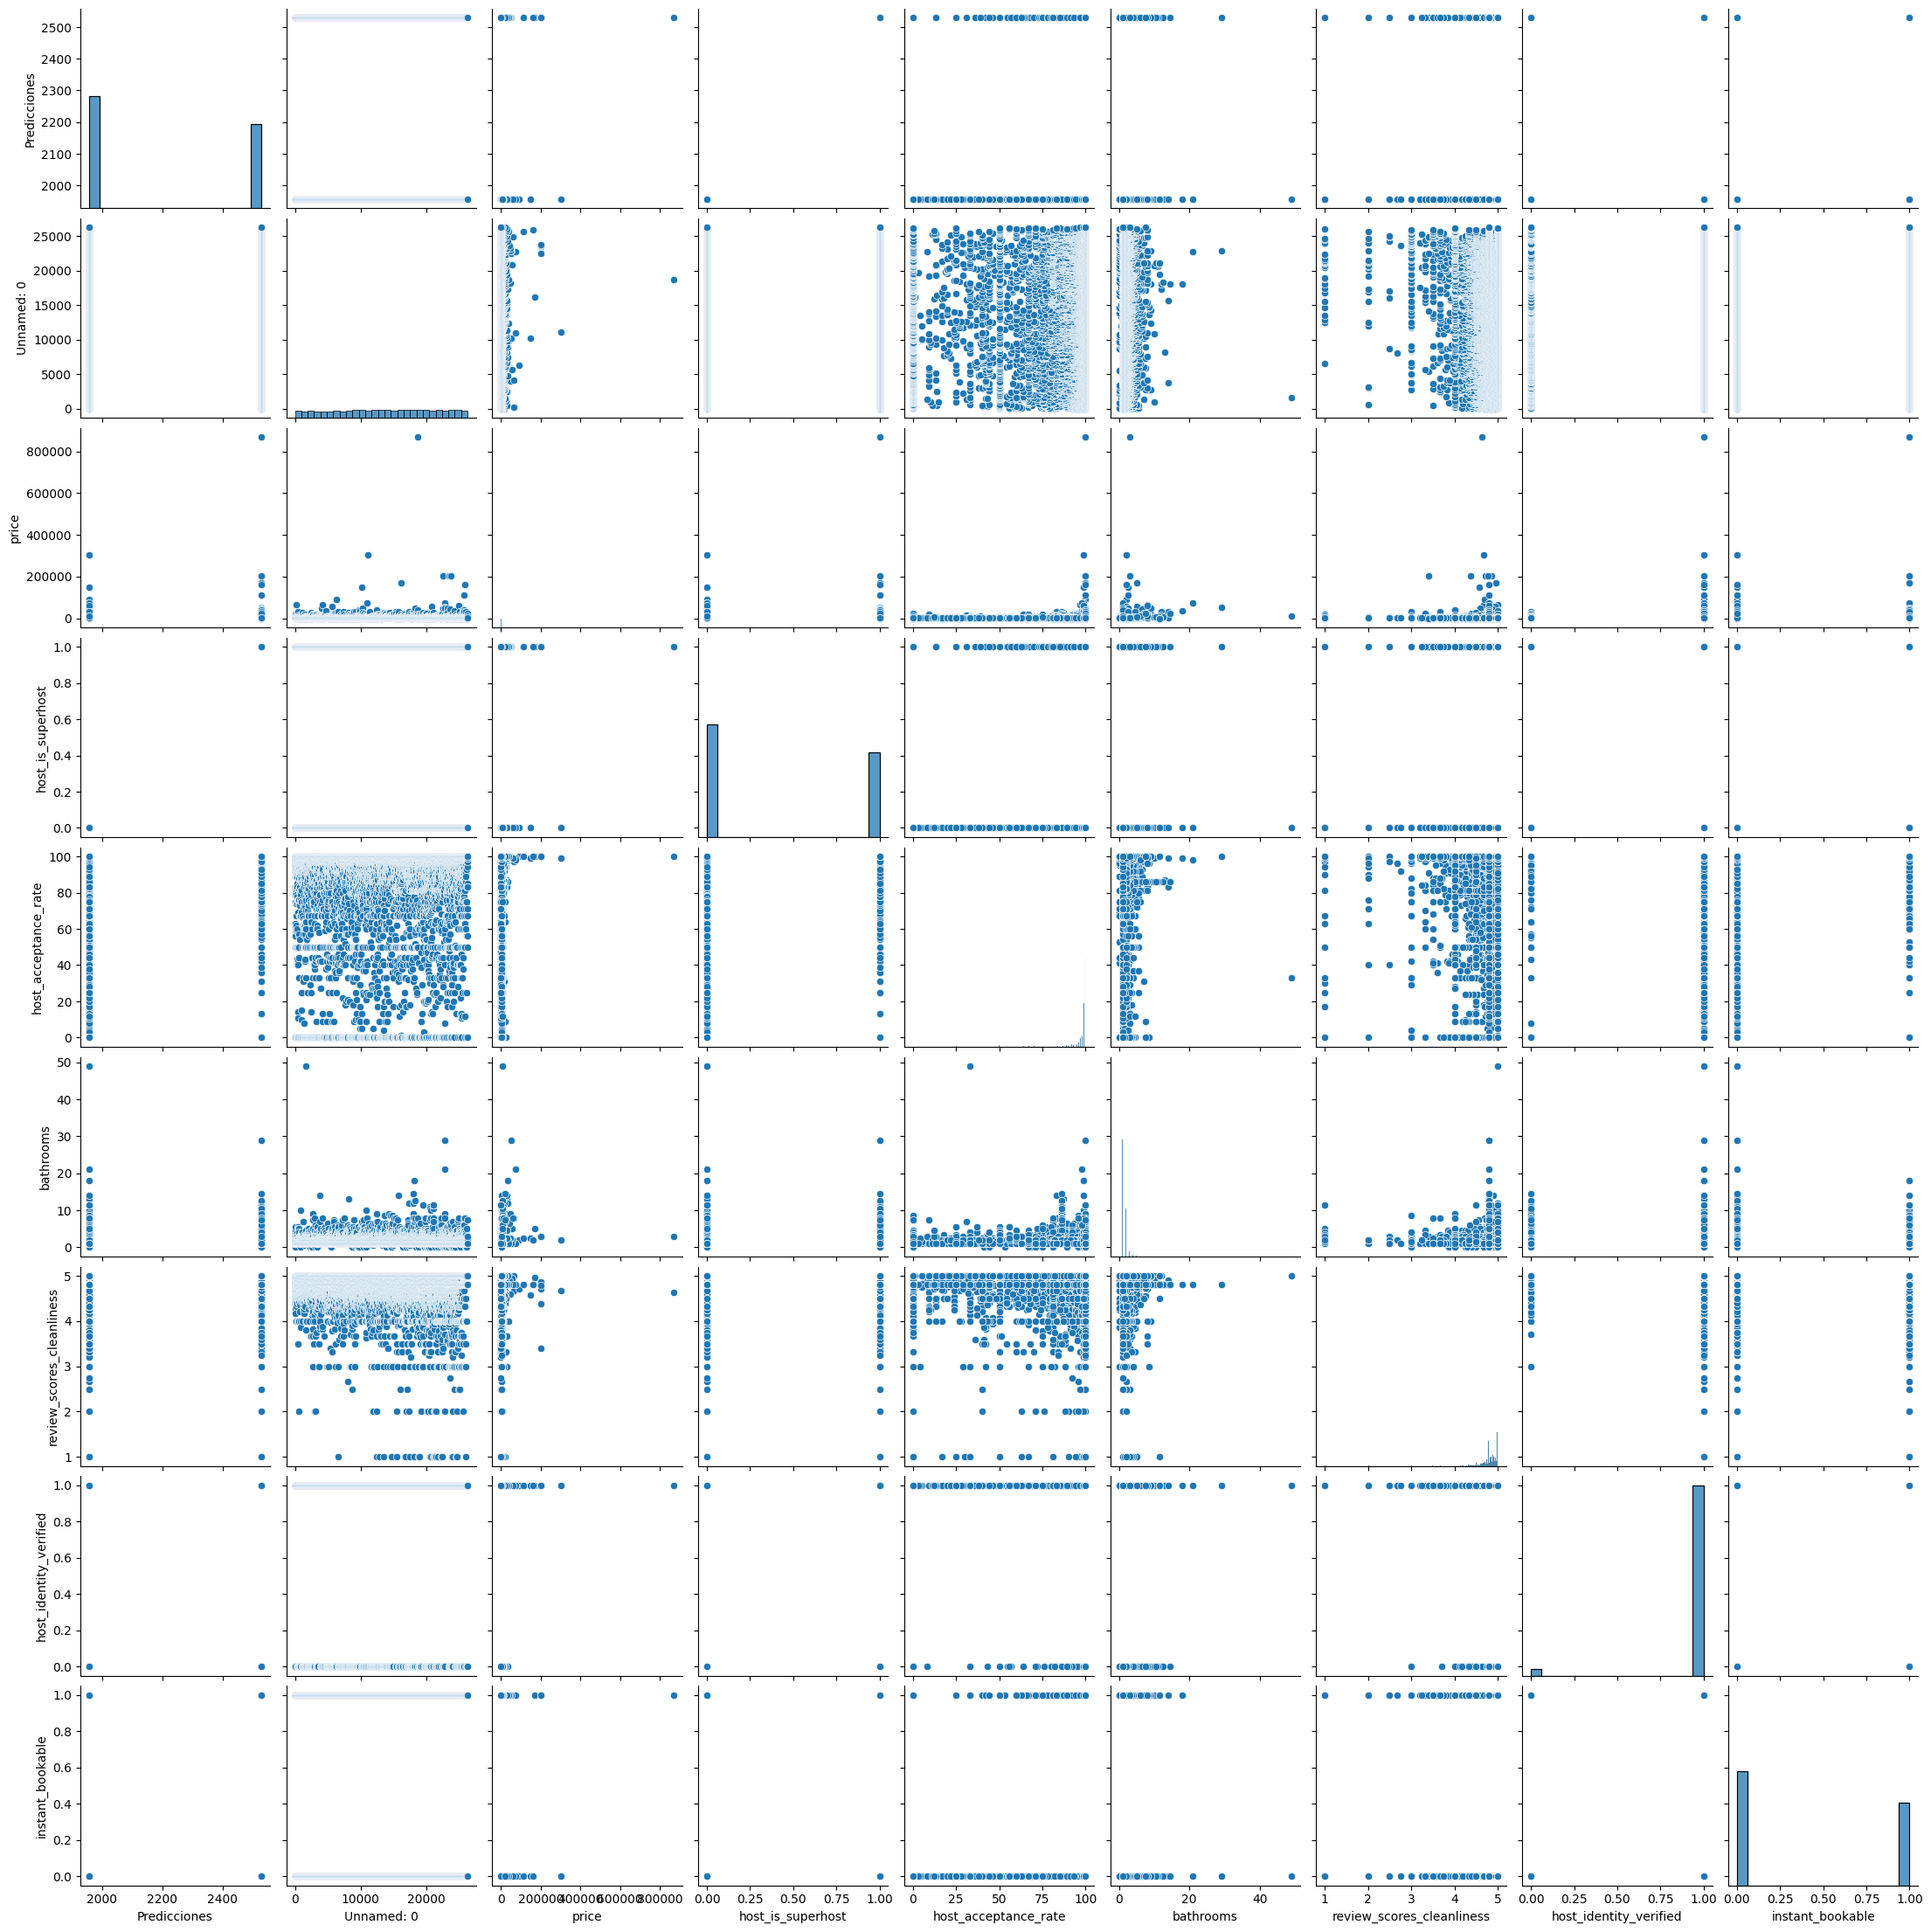

In [38]:
sns.pairplot(data2)

In [39]:
#Correlaci9ones entre variables
Corr_Factors=data2.corr()
Corr_Factors

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000   -0.004842  0.032959   
Unnamed: 0                    -0.004842    1.000000  0.032099   
price                          0.032959    0.032099  1.000000   
host_is_superhost              1.000000   -0.004842  0.032959   
host_acceptance_rate           0.205222    0.049559  0.023055   
bathrooms                      0.028757    0.012079  0.191938   
review_scores_cleanliness      0.201894   -0.047282  0.002574   
host_identity_verified         0.062961    0.043859 -0.002570   
instant_bookable               0.057001    0.207518  0.025645   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        1.000000              0.205222   0.028757   
Unnamed: 0                         -0.004842              0.049559   0.012079   
price                               0.032959              0.023055   0.191938   
host_is_superhost                   1.000000              0.205222   0.028757   
host_acceptance_rate                0.205222              1.000000  -0.015687   
bathrooms                           0.028757             -0.015687   1.000000   
review_scores_cleanliness           0.201894              0.080412   0.010762   
host_identity_verified              0.062961             -0.008928  -0.054841   
instant_bookable                    0.057001              0.249771  -0.000977   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.201894                0.062961   
Unnamed: 0                                 -0.047282                0.043859   
price                                       0.002574               -0.002570   
host_is_superhost                           0.201894                0.062961   
host_acceptance_rate                        0.080412               -0.008928   
bathrooms                                   0.010762               -0.054841   
review_scores_cleanliness                   1.000000               -0.019214   
host_identity_verified                     -0.019214                1.000000   
instant_bookable                           -0.051659                0.057544   

                           instant_bookable  
Predicciones                       0.057001  
Unnamed: 0                         0.207518  
price                              0.025645  
host_is_superhost                  0.057001  
host_acceptance_rate               0.249771  
bathrooms                         -0.000977  
review_scores_cleanliness         -0.051659  
host_identity_verified             0.057544  
instant_bookable                   1.000000

In [40]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.004842  0.032959   
Unnamed: 0                     0.004842    1.000000  0.032099   
price                          0.032959    0.032099  1.000000   
host_is_superhost              1.000000    0.004842  0.032959   
host_acceptance_rate           0.205222    0.049559  0.023055   
bathrooms                      0.028757    0.012079  0.191938   
review_scores_cleanliness      0.201894    0.047282  0.002574   
host_identity_verified         0.062961    0.043859  0.002570   
instant_bookable               0.057001    0.207518  0.025645   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        1.000000              0.205222   0.028757   
Unnamed: 0                          0.004842              0.049559   0.012079   
price                               0.032959              0.023055   0.191938   
host_is_superhost                   1.000000              0.205222   0.028757   
host_acceptance_rate                0.205222              1.000000   0.015687   
bathrooms                           0.028757              0.015687   1.000000   
review_scores_cleanliness           0.201894              0.080412   0.010762   
host_identity_verified              0.062961              0.008928   0.054841   
instant_bookable                    0.057001              0.249771   0.000977   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.201894                0.062961   
Unnamed: 0                                  0.047282                0.043859   
price                                       0.002574                0.002570   
host_is_superhost                           0.201894                0.062961   
host_acceptance_rate                        0.080412                0.008928   
bathrooms                                   0.010762                0.054841   
review_scores_cleanliness                   1.000000                0.019214   
host_identity_verified                      0.019214                1.000000   
instant_bookable                            0.051659                0.057544   

                           instant_bookable  
Predicciones                       0.057001  
Unnamed: 0                         0.207518  
price                              0.025645  
host_is_superhost                  0.057001  
host_acceptance_rate               0.249771  
bathrooms                          0.000977  
review_scores_cleanliness          0.051659  
host_identity_verified             0.057544  
instant_bookable                   1.000000

<Axes: >

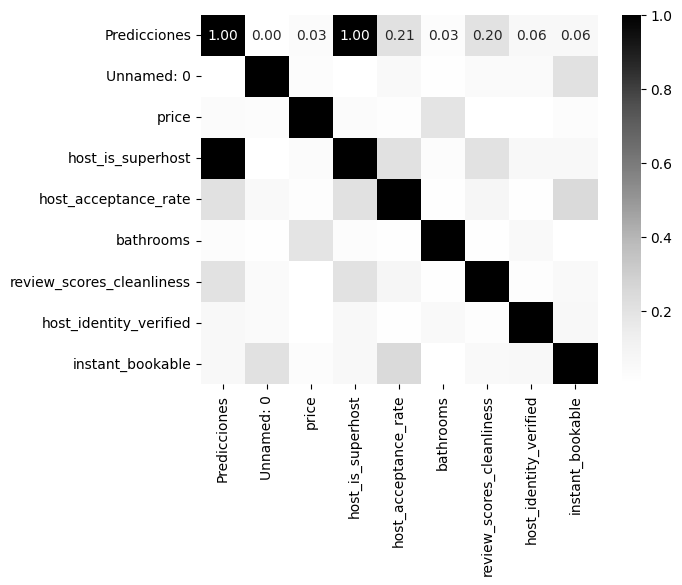

In [41]:
#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs bathrooms**

<Axes: xlabel='bathrooms', ylabel='price'>

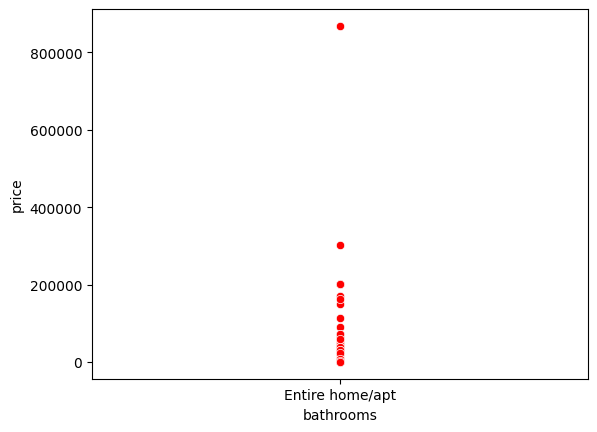

In [42]:
sns.scatterplot(x='bathrooms', y='price', color='blue', data=data_7)
sns.scatterplot(x='room_type', y='price', color='red', data=data_7)

In [43]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_7[['bathrooms']]
Var_Dep = data_7['price']

In [44]:
model=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [45]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [46]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [47]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1599.99732217]),
 'rank_': 1,
 'singular_': array([136.09418227]),
 'intercept_': -245.37404358016784}

In [48]:
# **modelo matematico**
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.03684019207845035

In [49]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([1354.62327859, 8554.61122836, 1354.62327859, ..., 1354.62327859,
       4554.61792293, 1354.62327859])

In [50]:
#Se inserta la columna "Predicciones" al dataframe
data_7.insert(0, 'Predicciones',y_pred)
data_7

Predicciones  Unnamed: 0        room_type    price  host_is_superhost  \
0       1354.623279           0  Entire home/apt   4044.0                0.0   
1       8554.611228           1  Entire home/apt  18000.0                1.0   
2       1354.623279           2  Entire home/apt   2123.0                1.0   
3       1354.623279           3  Entire home/apt   1236.0                1.0   
4       7754.612567           5  Entire home/apt   4056.0                1.0   
...             ...         ...              ...      ...                ...   
17425   1354.623279       26274  Entire home/apt   1212.0                0.0   
17426  11754.605873       26275  Entire home/apt  22347.0                1.0   
17427   1354.623279       26277  Entire home/apt   8897.0                0.0   
17428   4554.617923       26279  Entire home/apt   3125.0                1.0   
17429   1354.623279       26280  Entire home/apt    918.0                1.0   

       host_acceptance_rate  bathrooms  review_scores_cleanliness  \
0                      99.0        1.0                       4.80   
1                      92.0        5.5                       4.70   
2                      56.0        1.0                       4.76   
3                      94.0        1.0                       4.96   
4                      97.0        5.0                       4.84   
...                     ...        ...                        ...   
17425                 100.0        1.0                       4.80   
17426                 100.0        7.5                       4.80   
17427                 100.0        1.0                       4.80   
17428                 100.0        3.0                       4.80   
17429                 100.0        1.0                       4.80   

       host_identity_verified  instant_bookable       property_type  
0                         1.0               0.0        Entire villa  
1                         1.0               0.0         Entire home  
2                         1.0               0.0  Entire rental unit  
3                         1.0               0.0  Entire rental unit  
4                         1.0               0.0         Entire home  
...                       ...               ...                 ...  
17425                     1.0               1.0  Entire rental unit  
17426                     1.0               0.0         Entire home  
17427                     1.0               1.0  Entire rental unit  
17428                     1.0               1.0  Entire rental unit  
17429                     1.0               1.0  Entire rental unit  

[17430 rows x 11 columns]

In [51]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.03684019207845035

In [52]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.19193799019071328

In [53]:
#Eliminamos columna de tipo string
data7=data_7.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

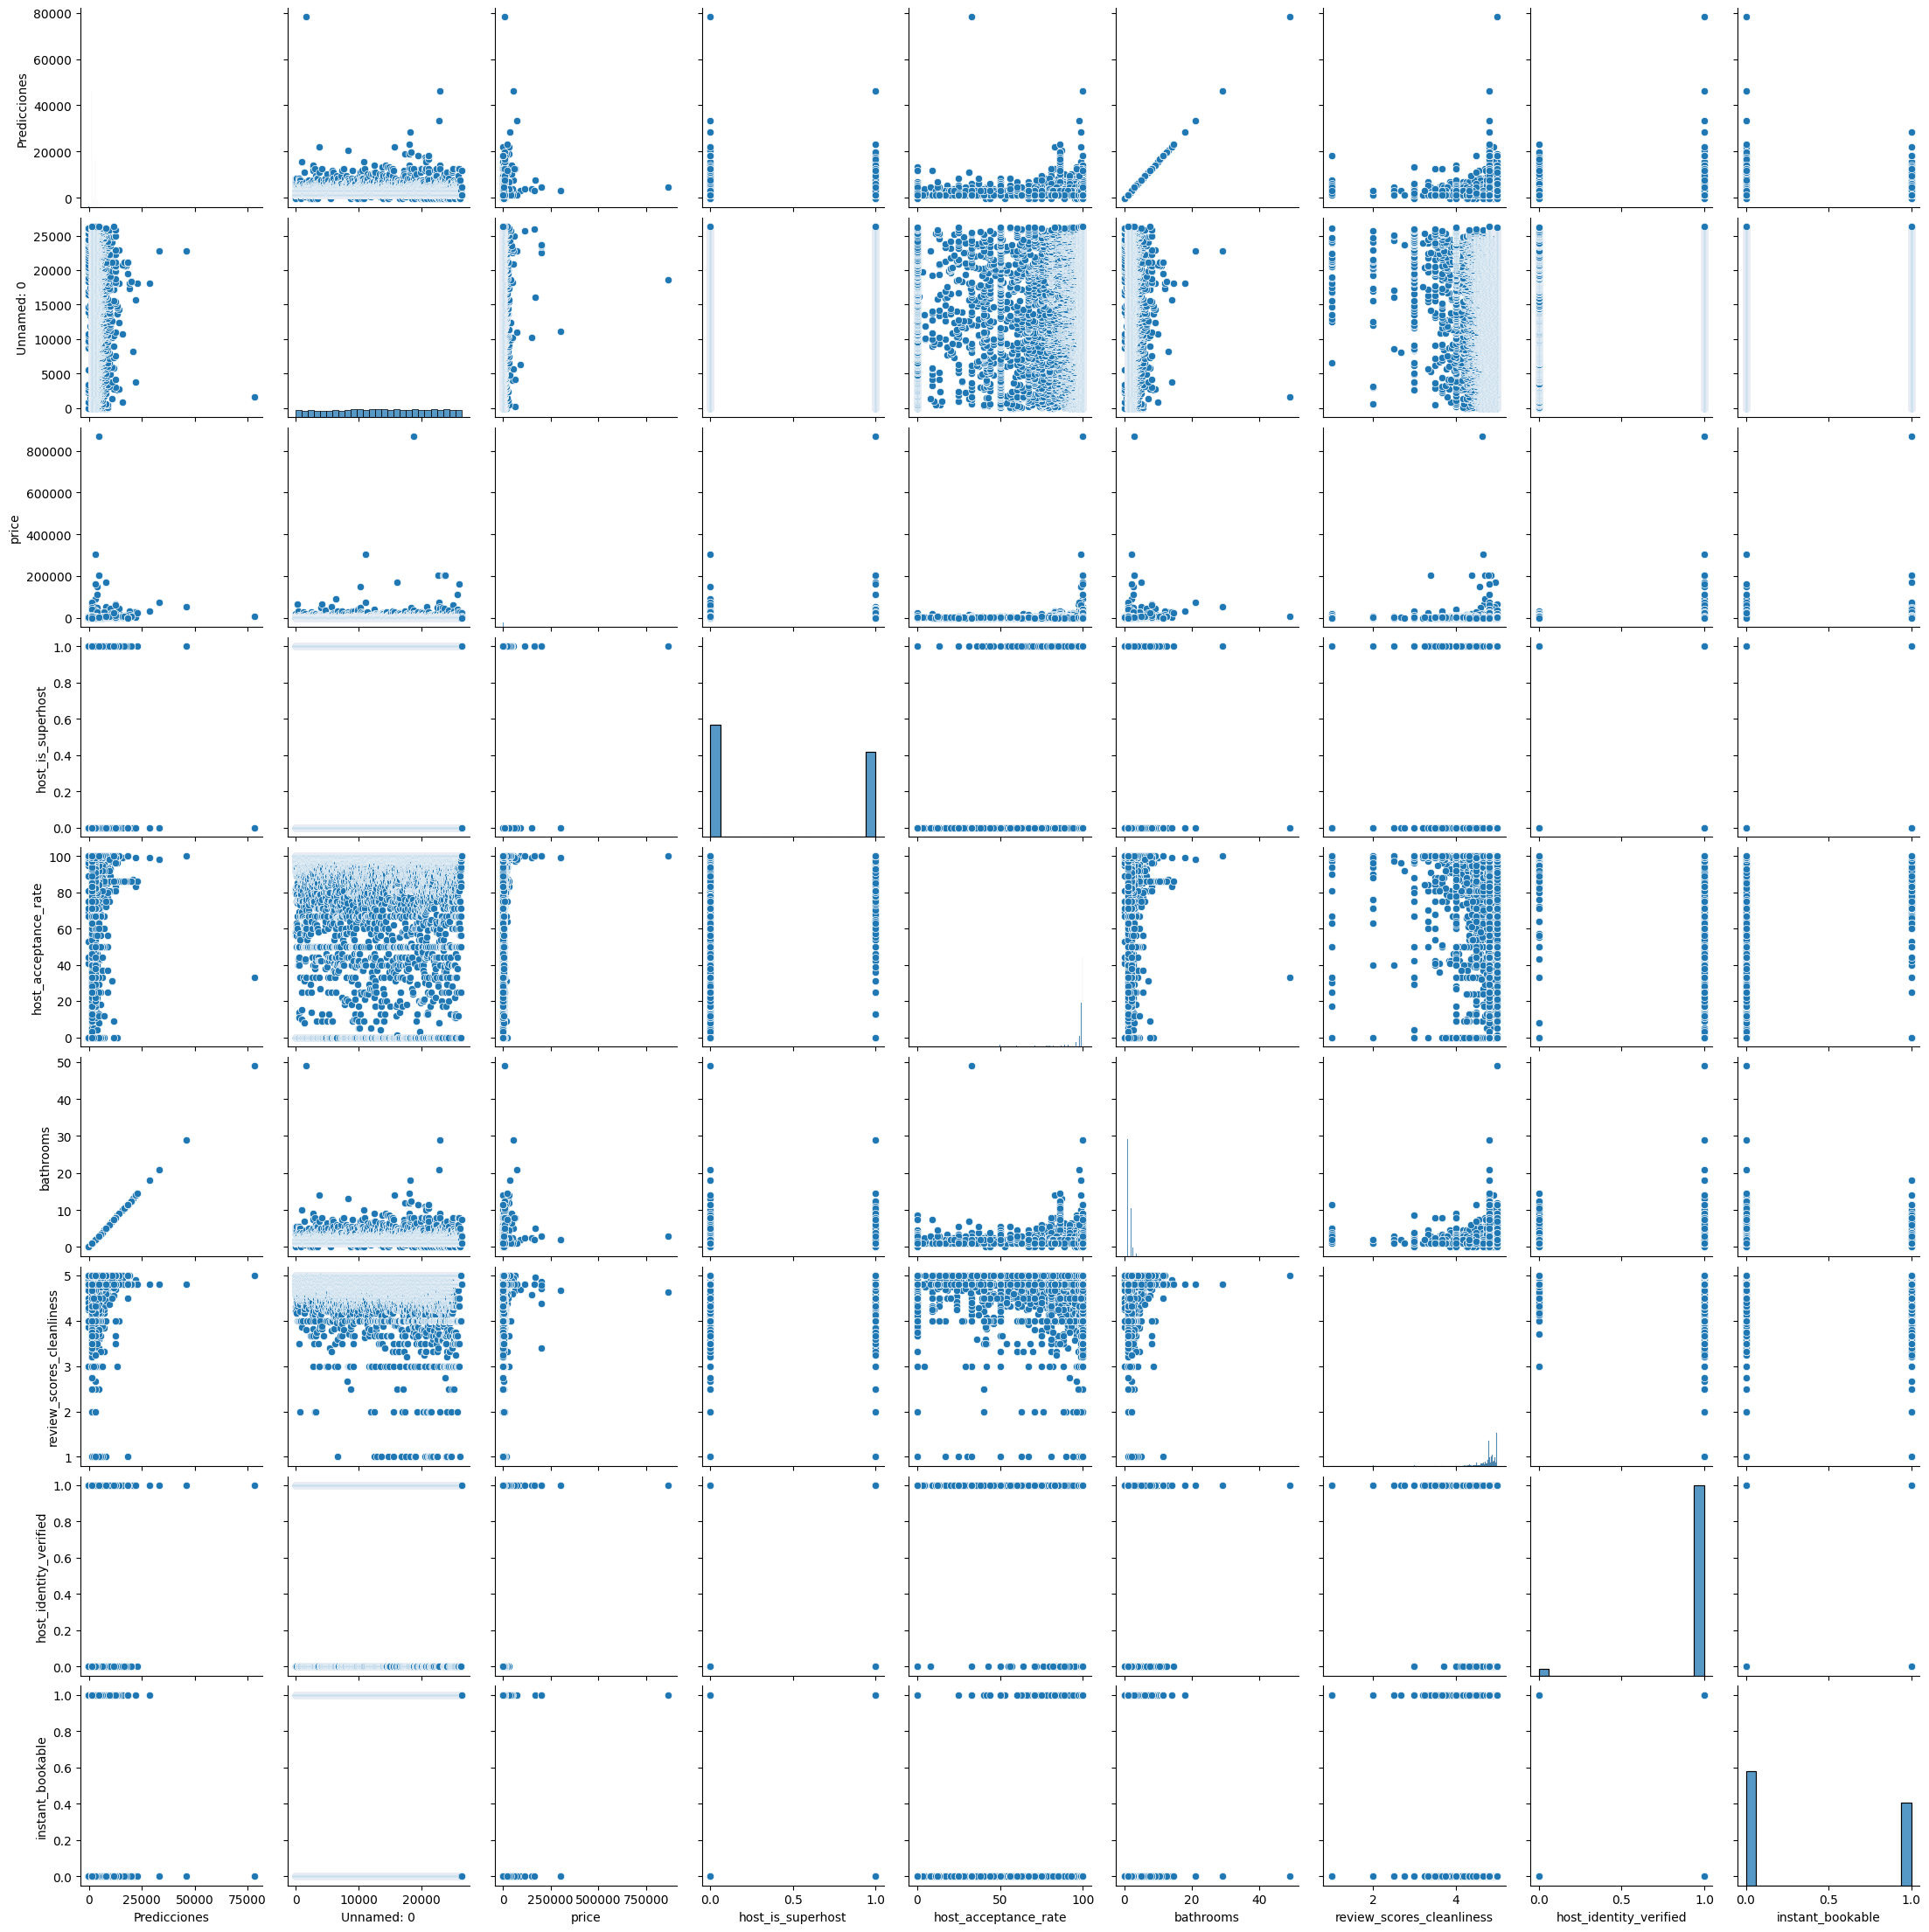

In [54]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data7)

In [55]:
#Correlaci9ones entre variables
Corr_Factors=data7.corr()
Corr_Factors

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.012079  0.191938   
Unnamed: 0                     0.012079    1.000000  0.032099   
price                          0.191938    0.032099  1.000000   
host_is_superhost              0.028757   -0.004842  0.032959   
host_acceptance_rate          -0.015687    0.049559  0.023055   
bathrooms                      1.000000    0.012079  0.191938   
review_scores_cleanliness      0.010762   -0.047282  0.002574   
host_identity_verified        -0.054841    0.043859 -0.002570   
instant_bookable              -0.000977    0.207518  0.025645   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.028757             -0.015687   1.000000   
Unnamed: 0                         -0.004842              0.049559   0.012079   
price                               0.032959              0.023055   0.191938   
host_is_superhost                   1.000000              0.205222   0.028757   
host_acceptance_rate                0.205222              1.000000  -0.015687   
bathrooms                           0.028757             -0.015687   1.000000   
review_scores_cleanliness           0.201894              0.080412   0.010762   
host_identity_verified              0.062961             -0.008928  -0.054841   
instant_bookable                    0.057001              0.249771  -0.000977   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.010762               -0.054841   
Unnamed: 0                                 -0.047282                0.043859   
price                                       0.002574               -0.002570   
host_is_superhost                           0.201894                0.062961   
host_acceptance_rate                        0.080412               -0.008928   
bathrooms                                   0.010762               -0.054841   
review_scores_cleanliness                   1.000000               -0.019214   
host_identity_verified                     -0.019214                1.000000   
instant_bookable                           -0.051659                0.057544   

                           instant_bookable  
Predicciones                      -0.000977  
Unnamed: 0                         0.207518  
price                              0.025645  
host_is_superhost                  0.057001  
host_acceptance_rate               0.249771  
bathrooms                         -0.000977  
review_scores_cleanliness         -0.051659  
host_identity_verified             0.057544  
instant_bookable                   1.000000

In [56]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.012079  0.191938   
Unnamed: 0                     0.012079    1.000000  0.032099   
price                          0.191938    0.032099  1.000000   
host_is_superhost              0.028757    0.004842  0.032959   
host_acceptance_rate           0.015687    0.049559  0.023055   
bathrooms                      1.000000    0.012079  0.191938   
review_scores_cleanliness      0.010762    0.047282  0.002574   
host_identity_verified         0.054841    0.043859  0.002570   
instant_bookable               0.000977    0.207518  0.025645   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.028757              0.015687   1.000000   
Unnamed: 0                          0.004842              0.049559   0.012079   
price                               0.032959              0.023055   0.191938   
host_is_superhost                   1.000000              0.205222   0.028757   
host_acceptance_rate                0.205222              1.000000   0.015687   
bathrooms                           0.028757              0.015687   1.000000   
review_scores_cleanliness           0.201894              0.080412   0.010762   
host_identity_verified              0.062961              0.008928   0.054841   
instant_bookable                    0.057001              0.249771   0.000977   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.010762                0.054841   
Unnamed: 0                                  0.047282                0.043859   
price                                       0.002574                0.002570   
host_is_superhost                           0.201894                0.062961   
host_acceptance_rate                        0.080412                0.008928   
bathrooms                                   0.010762                0.054841   
review_scores_cleanliness                   1.000000                0.019214   
host_identity_verified                      0.019214                1.000000   
instant_bookable                            0.051659                0.057544   

                           instant_bookable  
Predicciones                       0.000977  
Unnamed: 0                         0.207518  
price                              0.025645  
host_is_superhost                  0.057001  
host_acceptance_rate               0.249771  
bathrooms                          0.000977  
review_scores_cleanliness          0.051659  
host_identity_verified             0.057544  
instant_bookable                   1.000000

<Axes: >

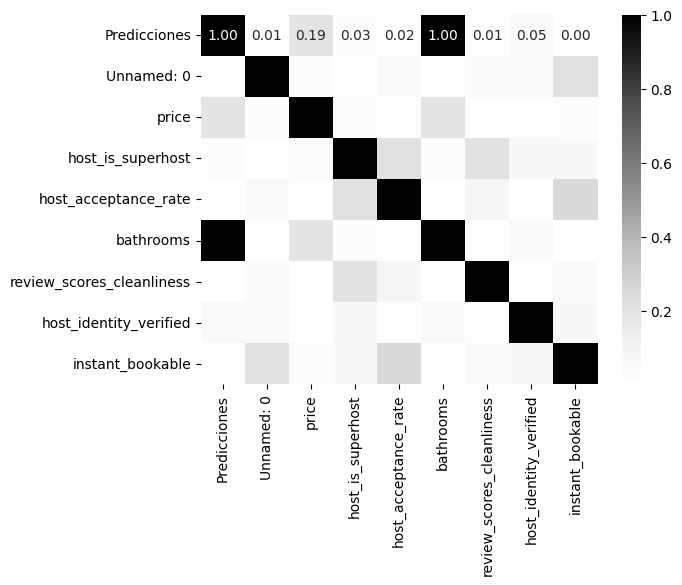

In [57]:

#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

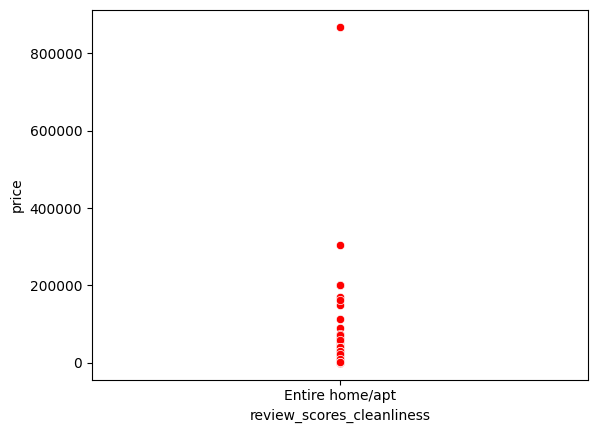

In [58]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=data)
sns.scatterplot(x='room_type', y='price', color='red', data=data_3)

In [59]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_3[['review_scores_cleanliness']]
Var_Dep = data_3['price']

In [60]:
model=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [61]:
type(model)

sklearn.linear_model._base.LinearRegression

In [62]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [63]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([72.03465614]),
 'rank_': 1,
 'singular_': array([40.53425017]),
 'intercept_': 1858.6363141348}

**modelo matemático**

In [64]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

6.62417069741128e-06

In [65]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([2204.40266362, 2197.19919801, 2201.52127738, ..., 2204.40266362,
       2204.40266362, 2204.40266362])

In [66]:
#Se inserta la columna "Predicciones" al dataframe
data_3.insert(0, 'Predicciones',y_pred)
data_3

Predicciones  Unnamed: 0        room_type    price  host_is_superhost  \
0       2204.402664           0  Entire home/apt   4044.0                0.0   
1       2197.199198           1  Entire home/apt  18000.0                1.0   
2       2201.521277           2  Entire home/apt   2123.0                1.0   
3       2215.928209           3  Entire home/apt   1236.0                1.0   
4       2207.284050           5  Entire home/apt   4056.0                1.0   
...             ...         ...              ...      ...                ...   
17425   2204.402664       26274  Entire home/apt   1212.0                0.0   
17426   2204.402664       26275  Entire home/apt  22347.0                1.0   
17427   2204.402664       26277  Entire home/apt   8897.0                0.0   
17428   2204.402664       26279  Entire home/apt   3125.0                1.0   
17429   2204.402664       26280  Entire home/apt    918.0                1.0   

       host_acceptance_rate  bathrooms  review_scores_cleanliness  \
0                      99.0        1.0                       4.80   
1                      92.0        5.5                       4.70   
2                      56.0        1.0                       4.76   
3                      94.0        1.0                       4.96   
4                      97.0        5.0                       4.84   
...                     ...        ...                        ...   
17425                 100.0        1.0                       4.80   
17426                 100.0        7.5                       4.80   
17427                 100.0        1.0                       4.80   
17428                 100.0        3.0                       4.80   
17429                 100.0        1.0                       4.80   

       host_identity_verified  instant_bookable       property_type  
0                         1.0               0.0        Entire villa  
1                         1.0               0.0         Entire home  
2                         1.0               0.0  Entire rental unit  
3                         1.0               0.0  Entire rental unit  
4                         1.0               0.0         Entire home  
...                       ...               ...                 ...  
17425                     1.0               1.0  Entire rental unit  
17426                     1.0               0.0         Entire home  
17427                     1.0               1.0  Entire rental unit  
17428                     1.0               1.0  Entire rental unit  
17429                     1.0               1.0  Entire rental unit  

[17430 rows x 11 columns]

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

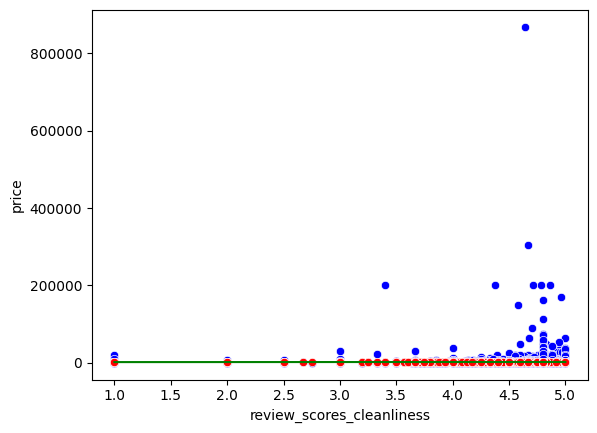

In [67]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=data_3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="red", data=data_3)
sns.lineplot(x='review_scores_cleanliness', y='Predicciones', color="green", data=data_3)

In [68]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

6.62417069741128e-06

In [69]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.002573746432228956

In [70]:
#Eliminamos columna de tipo string
data3=data_3.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

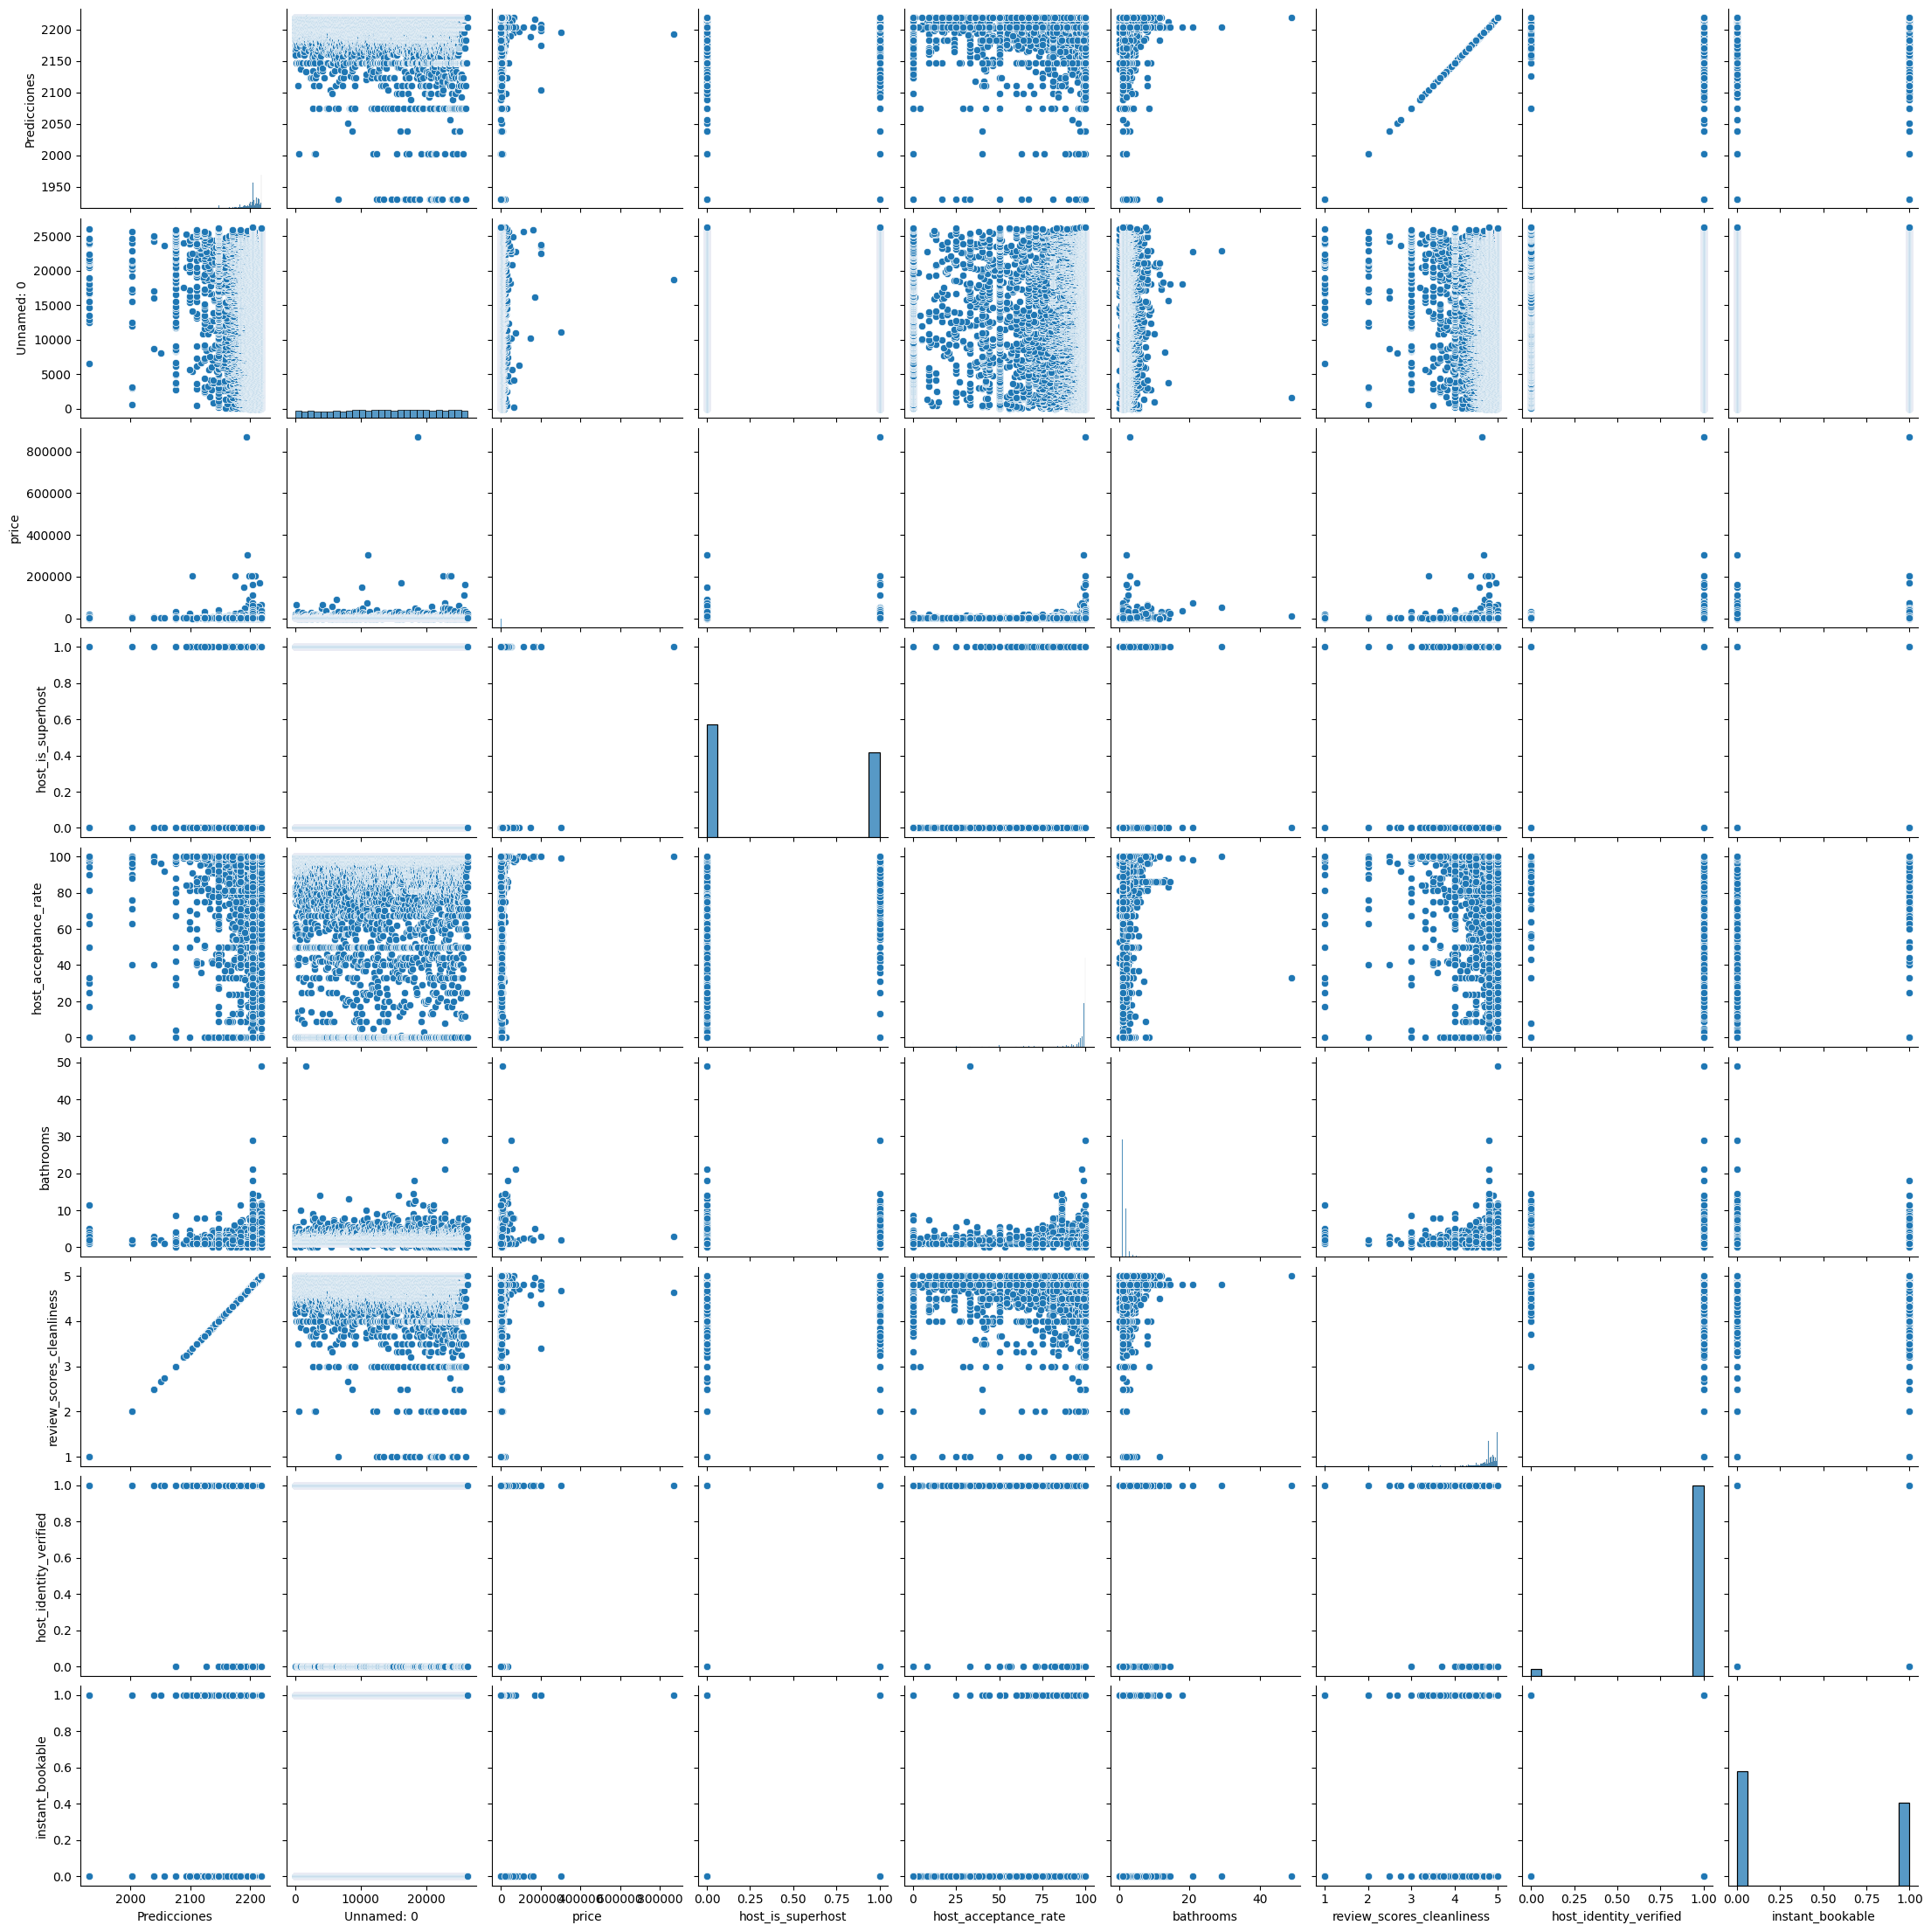

In [71]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data3)

In [72]:
#Correlaci9ones entre variables
Corr_Factors=data3.corr()
Corr_Factors

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000   -0.047282  0.002574   
Unnamed: 0                    -0.047282    1.000000  0.032099   
price                          0.002574    0.032099  1.000000   
host_is_superhost              0.201894   -0.004842  0.032959   
host_acceptance_rate           0.080412    0.049559  0.023055   
bathrooms                      0.010762    0.012079  0.191938   
review_scores_cleanliness      1.000000   -0.047282  0.002574   
host_identity_verified        -0.019214    0.043859 -0.002570   
instant_bookable              -0.051659    0.207518  0.025645   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.201894              0.080412   0.010762   
Unnamed: 0                         -0.004842              0.049559   0.012079   
price                               0.032959              0.023055   0.191938   
host_is_superhost                   1.000000              0.205222   0.028757   
host_acceptance_rate                0.205222              1.000000  -0.015687   
bathrooms                           0.028757             -0.015687   1.000000   
review_scores_cleanliness           0.201894              0.080412   0.010762   
host_identity_verified              0.062961             -0.008928  -0.054841   
instant_bookable                    0.057001              0.249771  -0.000977   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                1.000000               -0.019214   
Unnamed: 0                                 -0.047282                0.043859   
price                                       0.002574               -0.002570   
host_is_superhost                           0.201894                0.062961   
host_acceptance_rate                        0.080412               -0.008928   
bathrooms                                   0.010762               -0.054841   
review_scores_cleanliness                   1.000000               -0.019214   
host_identity_verified                     -0.019214                1.000000   
instant_bookable                           -0.051659                0.057544   

                           instant_bookable  
Predicciones                      -0.051659  
Unnamed: 0                         0.207518  
price                              0.025645  
host_is_superhost                  0.057001  
host_acceptance_rate               0.249771  
bathrooms                         -0.000977  
review_scores_cleanliness         -0.051659  
host_identity_verified             0.057544  
instant_bookable                   1.000000

In [73]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.047282  0.002574   
Unnamed: 0                     0.047282    1.000000  0.032099   
price                          0.002574    0.032099  1.000000   
host_is_superhost              0.201894    0.004842  0.032959   
host_acceptance_rate           0.080412    0.049559  0.023055   
bathrooms                      0.010762    0.012079  0.191938   
review_scores_cleanliness      1.000000    0.047282  0.002574   
host_identity_verified         0.019214    0.043859  0.002570   
instant_bookable               0.051659    0.207518  0.025645   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.201894              0.080412   0.010762   
Unnamed: 0                          0.004842              0.049559   0.012079   
price                               0.032959              0.023055   0.191938   
host_is_superhost                   1.000000              0.205222   0.028757   
host_acceptance_rate                0.205222              1.000000   0.015687   
bathrooms                           0.028757              0.015687   1.000000   
review_scores_cleanliness           0.201894              0.080412   0.010762   
host_identity_verified              0.062961              0.008928   0.054841   
instant_bookable                    0.057001              0.249771   0.000977   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                1.000000                0.019214   
Unnamed: 0                                  0.047282                0.043859   
price                                       0.002574                0.002570   
host_is_superhost                           0.201894                0.062961   
host_acceptance_rate                        0.080412                0.008928   
bathrooms                                   0.010762                0.054841   
review_scores_cleanliness                   1.000000                0.019214   
host_identity_verified                      0.019214                1.000000   
instant_bookable                            0.051659                0.057544   

                           instant_bookable  
Predicciones                       0.051659  
Unnamed: 0                         0.207518  
price                              0.025645  
host_is_superhost                  0.057001  
host_acceptance_rate               0.249771  
bathrooms                          0.000977  
review_scores_cleanliness          0.051659  
host_identity_verified             0.057544  
instant_bookable                   1.000000

<Axes: >

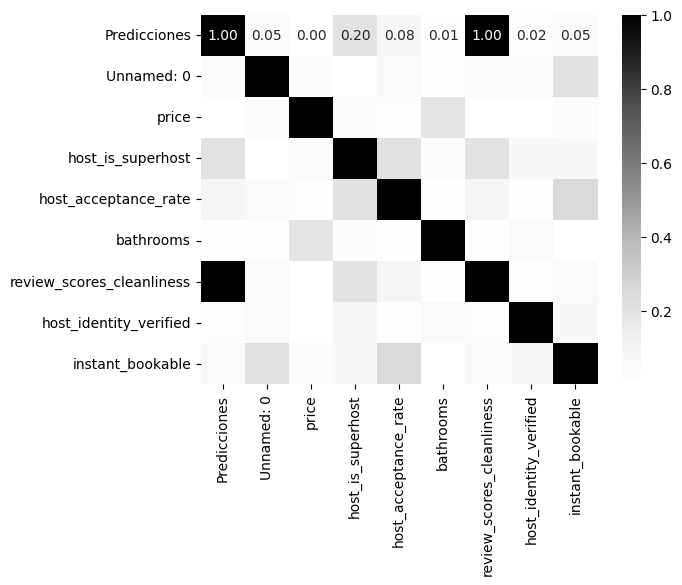

In [74]:
#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs host_identity_verified**

<Axes: xlabel='host_identity_verified', ylabel='price'>

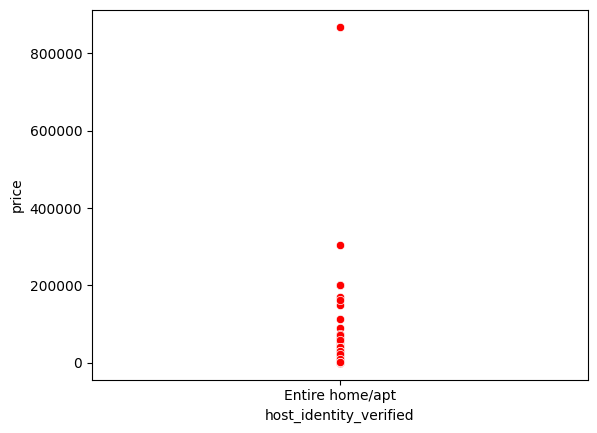

In [75]:
sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=data_4)
sns.scatterplot(x='room_type', y='price', color='red', data=data_4)

In [76]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_3[['host_identity_verified']]
Var_Dep = data_3['price']

In [77]:
model=LinearRegression()

In [78]:
type(model)

sklearn.linear_model._base.LinearRegression

In [79]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [80]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-122.13106204]),
 'rank_': 1,
 'singular_': array([23.87527353]),
 'intercept_': 2320.903389830498}

**modelo matemático**

In [81]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

6.606223041605297e-06

In [82]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([2198.77232779, 2198.77232779, 2198.77232779, ..., 2198.77232779,
       2198.77232779, 2198.77232779])

In [83]:
#Se inserta la columna "Predicciones" al dataframe
data_4.insert(0, 'Predicciones',y_pred)
data_4

Predicciones  Unnamed: 0        room_type    price  host_is_superhost  \
0       2198.772328           0  Entire home/apt   4044.0                0.0   
1       2198.772328           1  Entire home/apt  18000.0                1.0   
2       2198.772328           2  Entire home/apt   2123.0                1.0   
3       2198.772328           3  Entire home/apt   1236.0                1.0   
4       2198.772328           5  Entire home/apt   4056.0                1.0   
...             ...         ...              ...      ...                ...   
17425   2198.772328       26274  Entire home/apt   1212.0                0.0   
17426   2198.772328       26275  Entire home/apt  22347.0                1.0   
17427   2198.772328       26277  Entire home/apt   8897.0                0.0   
17428   2198.772328       26279  Entire home/apt   3125.0                1.0   
17429   2198.772328       26280  Entire home/apt    918.0                1.0   

       host_acceptance_rate  bathrooms  review_scores_cleanliness  \
0                      99.0        1.0                       4.80   
1                      92.0        5.5                       4.70   
2                      56.0        1.0                       4.76   
3                      94.0        1.0                       4.96   
4                      97.0        5.0                       4.84   
...                     ...        ...                        ...   
17425                 100.0        1.0                       4.80   
17426                 100.0        7.5                       4.80   
17427                 100.0        1.0                       4.80   
17428                 100.0        3.0                       4.80   
17429                 100.0        1.0                       4.80   

       host_identity_verified  instant_bookable       property_type  
0                         1.0               0.0        Entire villa  
1                         1.0               0.0         Entire home  
2                         1.0               0.0  Entire rental unit  
3                         1.0               0.0  Entire rental unit  
4                         1.0               0.0         Entire home  
...                       ...               ...                 ...  
17425                     1.0               1.0  Entire rental unit  
17426                     1.0               0.0         Entire home  
17427                     1.0               1.0  Entire rental unit  
17428                     1.0               1.0  Entire rental unit  
17429                     1.0               1.0  Entire rental unit  

[17430 rows x 11 columns]

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='host_identity_verified', ylabel='price'>

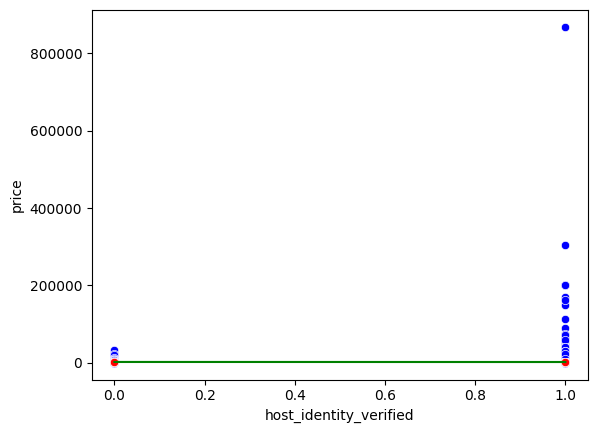

In [84]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=data_4)
sns.scatterplot(x='host_identity_verified', y='Predicciones', color="red", data=data_4)
sns.lineplot(x='host_identity_verified', y='Predicciones', color="green", data=data_4)


In [85]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

6.606223041605297e-06

In [86]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.002570257388201675

In [87]:
#Eliminamos columna de tipo string
data4=data_4.drop(data.select_dtypes(include=['object']).columns, axis=1)


In [88]:
#Correlaci9ones entre variables
Corr_Factors=data4.corr()
Corr_Factors

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000   -0.043859  0.002570   
Unnamed: 0                    -0.043859    1.000000  0.032099   
price                          0.002570    0.032099  1.000000   
host_is_superhost             -0.062961   -0.004842  0.032959   
host_acceptance_rate           0.008928    0.049559  0.023055   
bathrooms                      0.054841    0.012079  0.191938   
review_scores_cleanliness      0.019214   -0.047282  0.002574   
host_identity_verified        -1.000000    0.043859 -0.002570   
instant_bookable              -0.057544    0.207518  0.025645   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                       -0.062961              0.008928   0.054841   
Unnamed: 0                         -0.004842              0.049559   0.012079   
price                               0.032959              0.023055   0.191938   
host_is_superhost                   1.000000              0.205222   0.028757   
host_acceptance_rate                0.205222              1.000000  -0.015687   
bathrooms                           0.028757             -0.015687   1.000000   
review_scores_cleanliness           0.201894              0.080412   0.010762   
host_identity_verified              0.062961             -0.008928  -0.054841   
instant_bookable                    0.057001              0.249771  -0.000977   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.019214               -1.000000   
Unnamed: 0                                 -0.047282                0.043859   
price                                       0.002574               -0.002570   
host_is_superhost                           0.201894                0.062961   
host_acceptance_rate                        0.080412               -0.008928   
bathrooms                                   0.010762               -0.054841   
review_scores_cleanliness                   1.000000               -0.019214   
host_identity_verified                     -0.019214                1.000000   
instant_bookable                           -0.051659                0.057544   

                           instant_bookable  
Predicciones                      -0.057544  
Unnamed: 0                         0.207518  
price                              0.025645  
host_is_superhost                  0.057001  
host_acceptance_rate               0.249771  
bathrooms                         -0.000977  
review_scores_cleanliness         -0.051659  
host_identity_verified             0.057544  
instant_bookable                   1.000000

In [89]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.043859  0.002570   
Unnamed: 0                     0.043859    1.000000  0.032099   
price                          0.002570    0.032099  1.000000   
host_is_superhost              0.062961    0.004842  0.032959   
host_acceptance_rate           0.008928    0.049559  0.023055   
bathrooms                      0.054841    0.012079  0.191938   
review_scores_cleanliness      0.019214    0.047282  0.002574   
host_identity_verified         1.000000    0.043859  0.002570   
instant_bookable               0.057544    0.207518  0.025645   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.062961              0.008928   0.054841   
Unnamed: 0                          0.004842              0.049559   0.012079   
price                               0.032959              0.023055   0.191938   
host_is_superhost                   1.000000              0.205222   0.028757   
host_acceptance_rate                0.205222              1.000000   0.015687   
bathrooms                           0.028757              0.015687   1.000000   
review_scores_cleanliness           0.201894              0.080412   0.010762   
host_identity_verified              0.062961              0.008928   0.054841   
instant_bookable                    0.057001              0.249771   0.000977   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.019214                1.000000   
Unnamed: 0                                  0.047282                0.043859   
price                                       0.002574                0.002570   
host_is_superhost                           0.201894                0.062961   
host_acceptance_rate                        0.080412                0.008928   
bathrooms                                   0.010762                0.054841   
review_scores_cleanliness                   1.000000                0.019214   
host_identity_verified                      0.019214                1.000000   
instant_bookable                            0.051659                0.057544   

                           instant_bookable  
Predicciones                       0.057544  
Unnamed: 0                         0.207518  
price                              0.025645  
host_is_superhost                  0.057001  
host_acceptance_rate               0.249771  
bathrooms                          0.000977  
review_scores_cleanliness          0.051659  
host_identity_verified             0.057544  
instant_bookable                   1.000000

<Axes: >

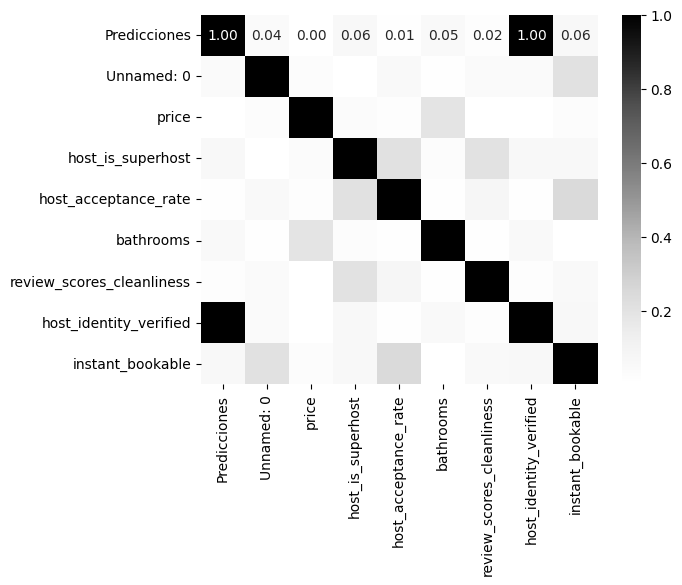

In [90]:
#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs instant_bookable**

<Axes: xlabel='instant_bookable', ylabel='price'>

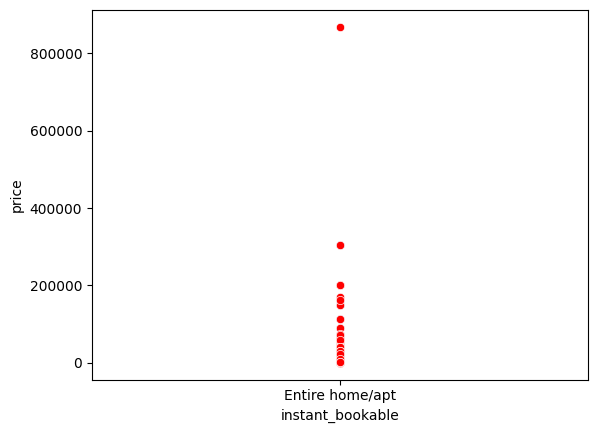

In [91]:
sns.scatterplot(x='instant_bookable', y='price', color='blue', data=data_5)
sns.scatterplot(x='room_type', y='price', color='red', data=data_5)

In [92]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_5[['instant_bookable']]
Var_Dep = data_5['price']

In [93]:
model=LinearRegression()

type(model)

sklearn.linear_model._base.LinearRegression

In [94]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [95]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([446.56283605]),
 'rank_': 1,
 'singular_': array([65.15034733]),
 'intercept_': 2015.5703696382639}

In [96]:
# **modelo matematico**
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.0006576621964700102

In [97]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([2015.57036964, 2015.57036964, 2015.57036964, ..., 2462.13320569,
       2462.13320569, 2462.13320569])

In [100]:
#Se inserta la columna "Predicciones" al dataframe
data_5.insert(0, 'Predicciones',y_pred)
data_5

Predicciones  Unnamed: 0        room_type    price  host_is_superhost  \
0       2015.570370           0  Entire home/apt   4044.0                0.0   
1       2015.570370           1  Entire home/apt  18000.0                1.0   
2       2015.570370           2  Entire home/apt   2123.0                1.0   
3       2015.570370           3  Entire home/apt   1236.0                1.0   
4       2015.570370           5  Entire home/apt   4056.0                1.0   
...             ...         ...              ...      ...                ...   
17425   2462.133206       26274  Entire home/apt   1212.0                0.0   
17426   2015.570370       26275  Entire home/apt  22347.0                1.0   
17427   2462.133206       26277  Entire home/apt   8897.0                0.0   
17428   2462.133206       26279  Entire home/apt   3125.0                1.0   
17429   2462.133206       26280  Entire home/apt    918.0                1.0   

       host_acceptance_rate  bathrooms  review_scores_cleanliness  \
0                      99.0        1.0                       4.80   
1                      92.0        5.5                       4.70   
2                      56.0        1.0                       4.76   
3                      94.0        1.0                       4.96   
4                      97.0        5.0                       4.84   
...                     ...        ...                        ...   
17425                 100.0        1.0                       4.80   
17426                 100.0        7.5                       4.80   
17427                 100.0        1.0                       4.80   
17428                 100.0        3.0                       4.80   
17429                 100.0        1.0                       4.80   

       host_identity_verified  instant_bookable       property_type  
0                         1.0               0.0        Entire villa  
1                         1.0               0.0         Entire home  
2                         1.0               0.0  Entire rental unit  
3                         1.0               0.0  Entire rental unit  
4                         1.0               0.0         Entire home  
...                       ...               ...                 ...  
17425                     1.0               1.0  Entire rental unit  
17426                     1.0               0.0         Entire home  
17427                     1.0               1.0  Entire rental unit  
17428                     1.0               1.0  Entire rental unit  
17429                     1.0               1.0  Entire rental unit  

[17430 rows x 11 columns]

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='instant_bookable', ylabel='price'>

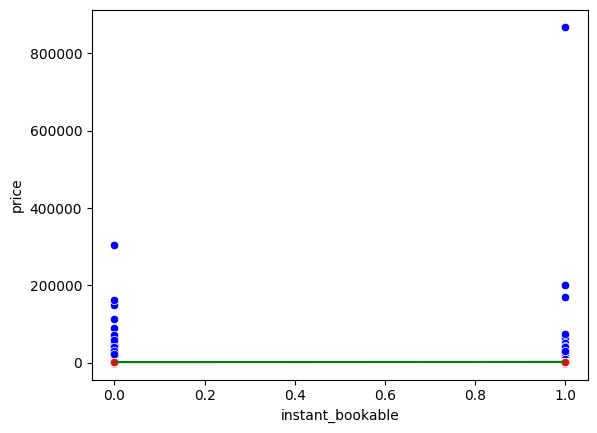

In [101]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=data_5)
sns.scatterplot(x='instant_bookable', y='Predicciones', color="red", data=data_5)
sns.lineplot(x='instant_bookable', y='Predicciones', color="green", data=data_5)

In [102]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0006576621964700102

In [103]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.025644925355126504

In [104]:
#Eliminamos columna de tipo string
data5=data_5.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

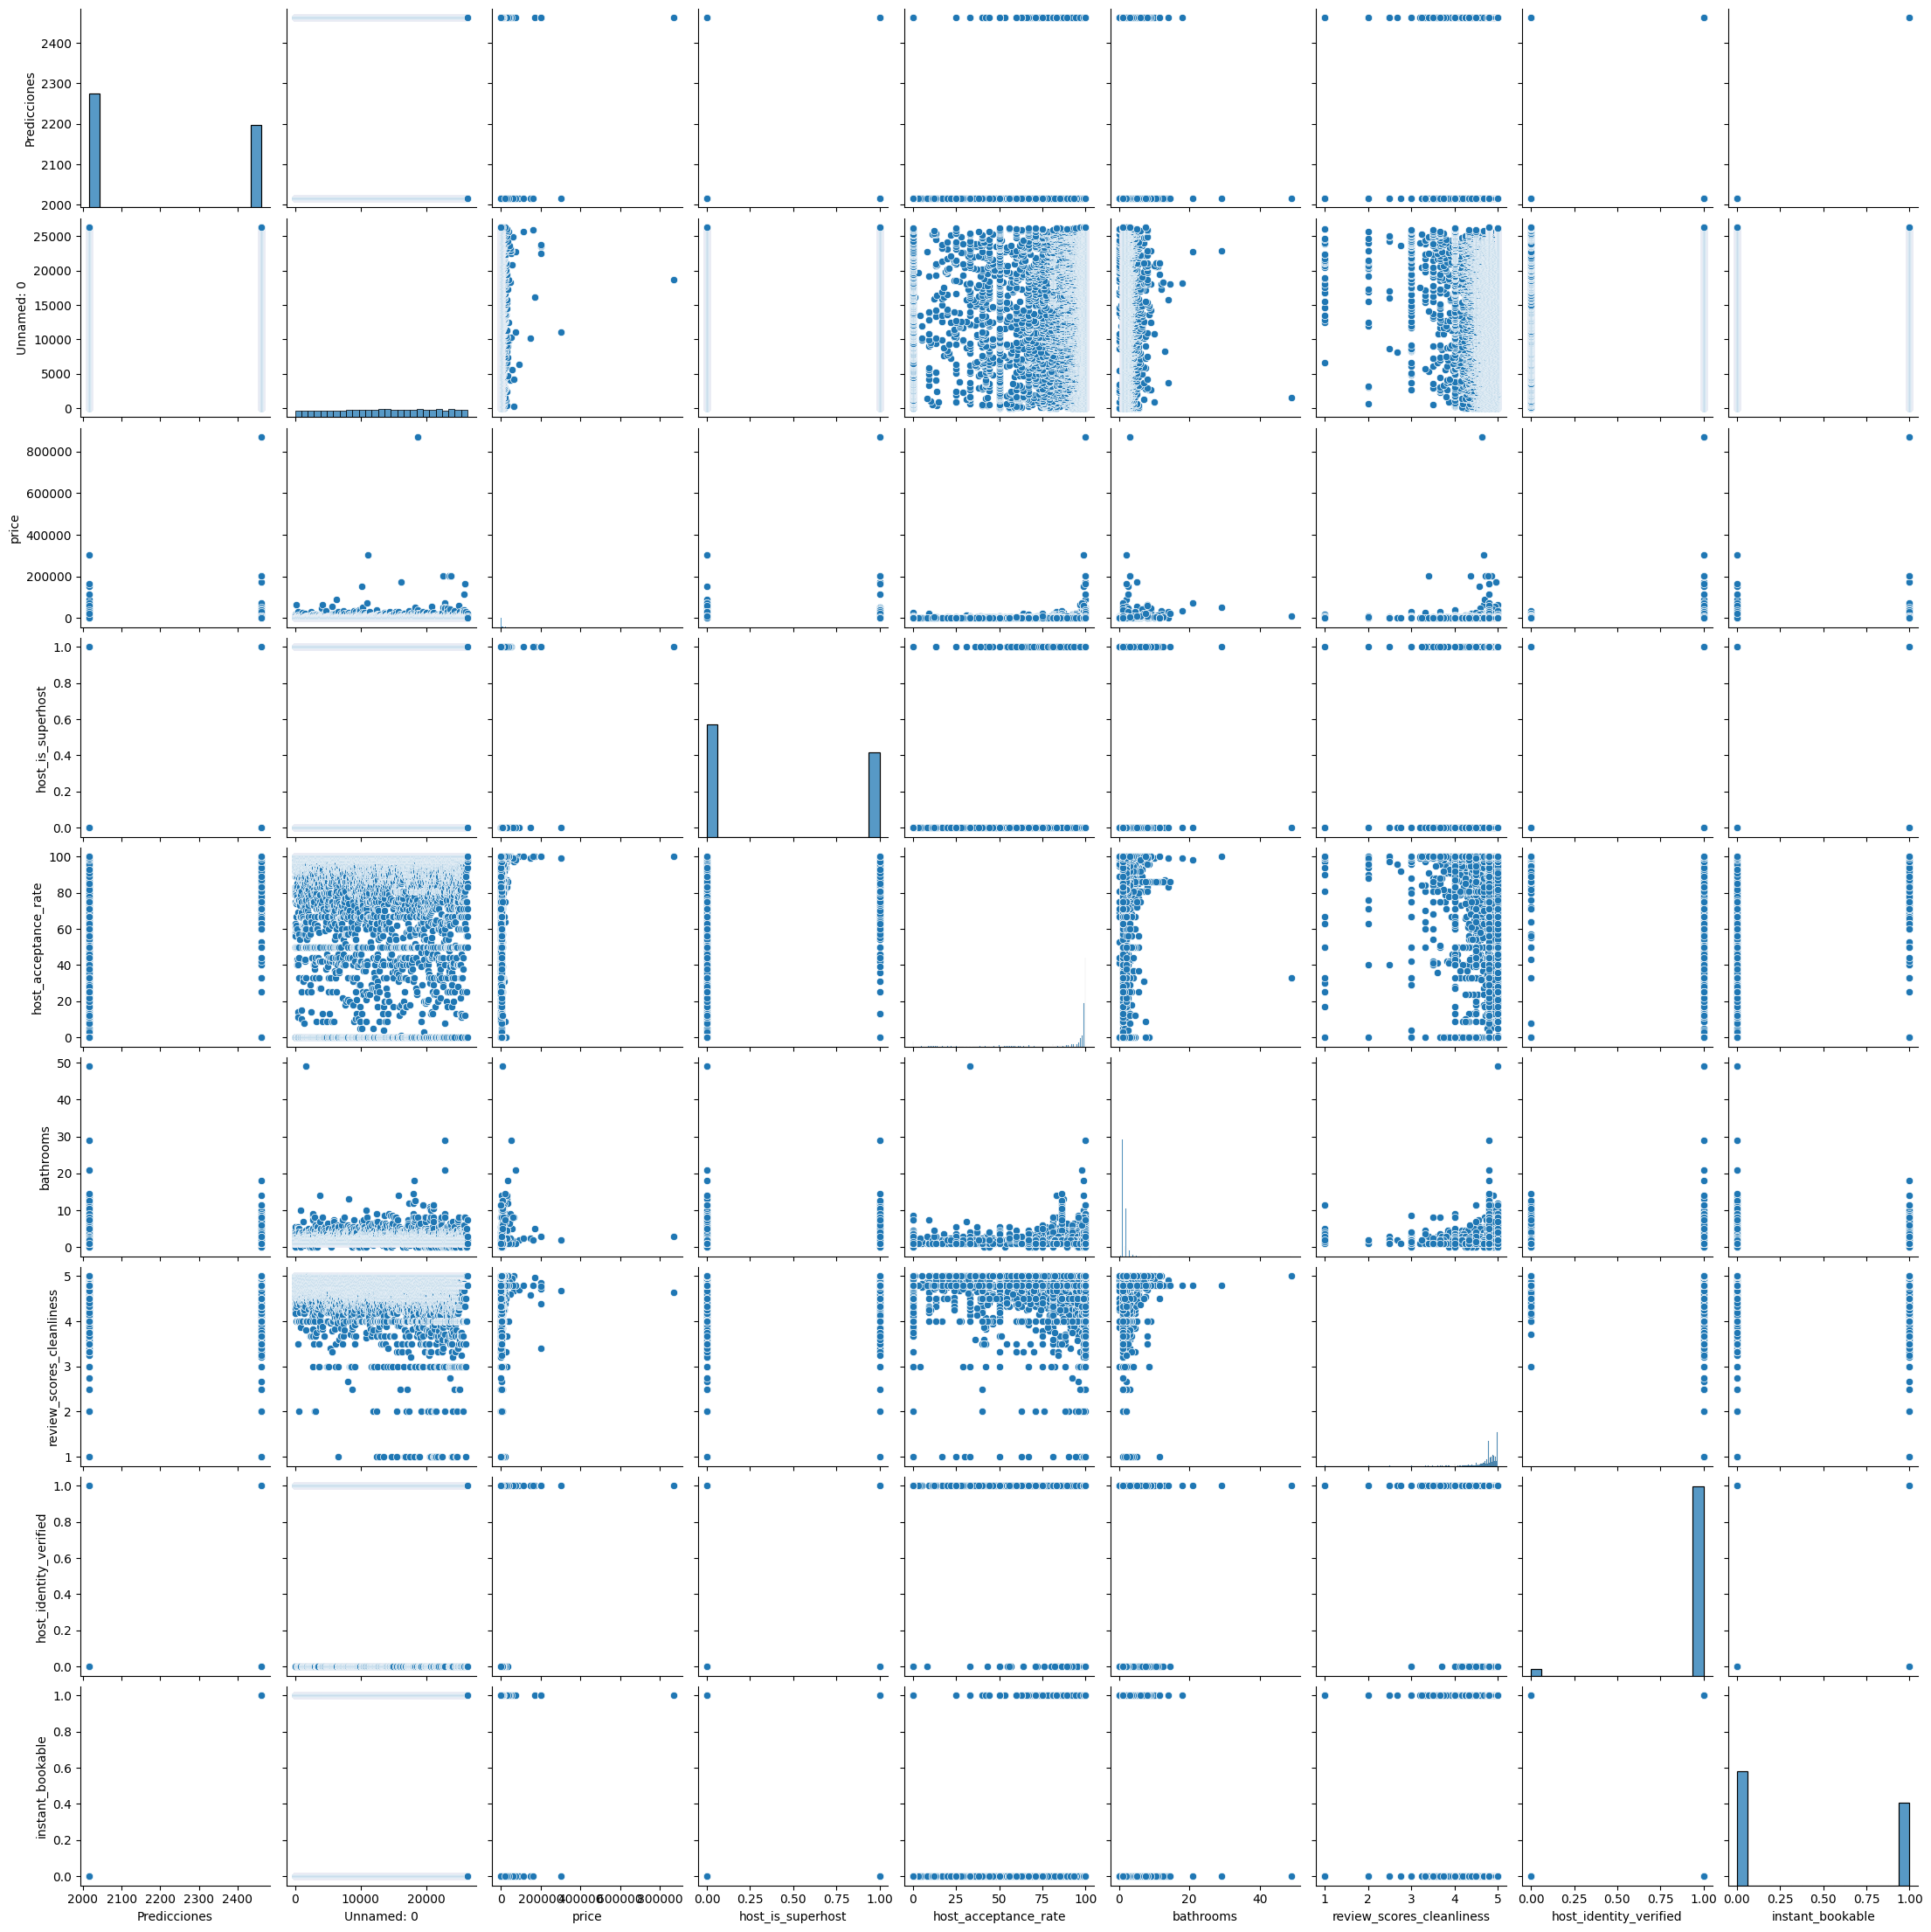

In [106]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data5)

In [107]:
#Correlaci9ones entre variables
Corr_Factors=data5.corr()
Corr_Factors

Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.207518  0.025645   
Unnamed: 0                     0.207518    1.000000  0.032099   
price                          0.025645    0.032099  1.000000   
host_is_superhost              0.057001   -0.004842  0.032959   
host_acceptance_rate           0.249771    0.049559  0.023055   
bathrooms                     -0.000977    0.012079  0.191938   
review_scores_cleanliness     -0.051659   -0.047282  0.002574   
host_identity_verified         0.057544    0.043859 -0.002570   
instant_bookable               1.000000    0.207518  0.025645   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.057001              0.249771  -0.000977   
Unnamed: 0                         -0.004842              0.049559   0.012079   
price                               0.032959              0.023055   0.191938   
host_is_superhost                   1.000000              0.205222   0.028757   
host_acceptance_rate                0.205222              1.000000  -0.015687   
bathrooms                           0.028757             -0.015687   1.000000   
review_scores_cleanliness           0.201894              0.080412   0.010762   
host_identity_verified              0.062961             -0.008928  -0.054841   
instant_bookable                    0.057001              0.249771  -0.000977   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                               -0.051659                0.057544   
Unnamed: 0                                 -0.047282                0.043859   
price                                       0.002574               -0.002570   
host_is_superhost                           0.201894                0.062961   
host_acceptance_rate                        0.080412               -0.008928   
bathrooms                                   0.010762               -0.054841   
review_scores_cleanliness                   1.000000               -0.019214   
host_identity_verified                     -0.019214                1.000000   
instant_bookable                           -0.051659                0.057544   

                           instant_bookable  
Predicciones                       1.000000  
Unnamed: 0                         0.207518  
price                              0.025645  
host_is_superhost                  0.057001  
host_acceptance_rate               0.249771  
bathrooms                         -0.000977  
review_scores_cleanliness         -0.051659  
host_identity_verified             0.057544  
instant_bookable                   1.000000

In [108]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1


Predicciones  Unnamed: 0     price  \
Predicciones                   1.000000    0.207518  0.025645   
Unnamed: 0                     0.207518    1.000000  0.032099   
price                          0.025645    0.032099  1.000000   
host_is_superhost              0.057001    0.004842  0.032959   
host_acceptance_rate           0.249771    0.049559  0.023055   
bathrooms                      0.000977    0.012079  0.191938   
review_scores_cleanliness      0.051659    0.047282  0.002574   
host_identity_verified         0.057544    0.043859  0.002570   
instant_bookable               1.000000    0.207518  0.025645   

                           host_is_superhost  host_acceptance_rate  bathrooms  \
Predicciones                        0.057001              0.249771   0.000977   
Unnamed: 0                          0.004842              0.049559   0.012079   
price                               0.032959              0.023055   0.191938   
host_is_superhost                   1.000000              0.205222   0.028757   
host_acceptance_rate                0.205222              1.000000   0.015687   
bathrooms                           0.028757              0.015687   1.000000   
review_scores_cleanliness           0.201894              0.080412   0.010762   
host_identity_verified              0.062961              0.008928   0.054841   
instant_bookable                    0.057001              0.249771   0.000977   

                           review_scores_cleanliness  host_identity_verified  \
Predicciones                                0.051659                0.057544   
Unnamed: 0                                  0.047282                0.043859   
price                                       0.002574                0.002570   
host_is_superhost                           0.201894                0.062961   
host_acceptance_rate                        0.080412                0.008928   
bathrooms                                   0.010762                0.054841   
review_scores_cleanliness                   1.000000                0.019214   
host_identity_verified                      0.019214                1.000000   
instant_bookable                            0.051659                0.057544   

                           instant_bookable  
Predicciones                       1.000000  
Unnamed: 0                         0.207518  
price                              0.025645  
host_is_superhost                  0.057001  
host_acceptance_rate               0.249771  
bathrooms                          0.000977  
review_scores_cleanliness          0.051659  
host_identity_verified             0.057544  
instant_bookable                   1.000000

<Axes: >

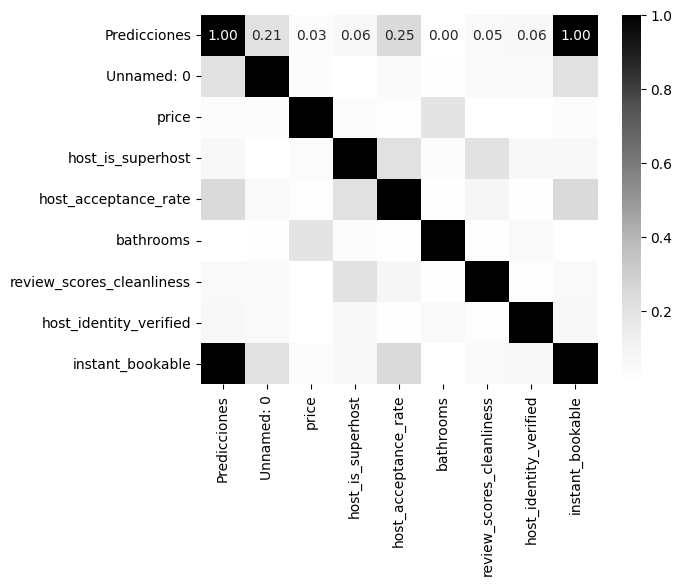

In [109]:

#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs property_type**